In [1]:
from tslearn.clustering import TimeSeriesKMeans
import pickle
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as dist

from sklearn.metrics import davies_bouldin_score
from sklearn.utils import check_random_state
from sklearn.utils import check_X_y
from sklearn.utils import _safe_indexing
from sklearn.metrics.pairwise import pairwise_distances_chunked
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import LabelEncoder


In [2]:
def check_number_of_labels(n_labels, n_samples):
    """Check that number of labels are valid.

    Parameters
    ----------
    n_labels : int
        Number of labels.

    n_samples : int
        Number of samples.
    """
    if not 1 < n_labels < n_samples:
        raise ValueError(
            "Number of labels is %d. Valid values are 2 to n_samples - 1 (inclusive)"
            % n_labels
        )

def davies_bouldin_score(X, labels,centroids):
    """Compute the Davies-Bouldin score.

    The score is defined as the average similarity measure of each cluster with
    its most similar cluster, where similarity is the ratio of within-cluster
    distances to between-cluster distances. Thus, clusters which are farther
    apart and less dispersed will result in a better score.

    The minimum score is zero, with lower values indicating better clustering.

    Read more in the :ref:`User Guide <davies-bouldin_index>`.

    .. versionadded:: 0.20

    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        A list of ``n_features``-dimensional data points. Each row corresponds
        to a single data point.

    labels : array-like of shape (n_samples,)
        Predicted labels for each sample.

    Returns
    -------
    score: float
        The resulting Davies-Bouldin score.

    References
    ----------
    .. [1] Davies, David L.; Bouldin, Donald W. (1979).
       `"A Cluster Separation Measure"
       <https://ieeexplore.ieee.org/document/4766909>`__.
       IEEE Transactions on Pattern Analysis and Machine Intelligence.
       PAMI-1 (2): 224-227
    """
    X, labels = check_X_y(X, labels)
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    n_samples, _ = X.shape
    n_labels = len(le.classes_)
    check_number_of_labels(n_labels, n_samples)

    intra_dists = np.zeros(n_labels)
    #centroids = np.zeros((n_labels, len(X[0])), dtype=float)
    for k in range(n_labels):
        cluster_k = _safe_indexing(X, labels == k)
        #centroid = cluster_k.mean(axis=0)
        #centroids[k] = centroid
        intra_dists[k] = np.average(pairwise_distances(cluster_k, [centroids[k]]))

    centroid_distances = pairwise_distances(centroids)

    if np.allclose(intra_dists, 0) or np.allclose(centroid_distances, 0):
        return 0.0

    centroid_distances[centroid_distances == 0] = np.inf
    combined_intra_dists = intra_dists[:, None] + intra_dists
    scores = np.max(combined_intra_dists / centroid_distances, axis=1)
    return np.mean(scores)


In [3]:
with open('./pickles/allPixelNDVIPoly.pickle', 'rb') as handle:
    allPixelNDVIPoly3 = pickle.load(handle)

with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)

with open('./pickles/allPixelNDVIPoly4.pickle', 'rb') as handle:
    allPixelNDVIPoly4 = pickle.load(handle)

with open('./pickles/newResa4.pickle', 'rb') as handle:
    newResa4 = pickle.load(handle)

with open('./pickles/allPixelNDVIPoly6.pickle', 'rb') as handle:
    allPixelNDVIPoly6 = pickle.load(handle)

with open('./pickles/newResa6.pickle', 'rb') as handle:
    newResa6 = pickle.load(handle)

with open('./pickles/kluster_centroids_3_c2.pickle', 'rb') as handle:
    centroids_3 = pickle.load(handle)

with open('./pickles/kluster_centroids_4_c2.pickle', 'rb') as handle:
    centroids_4 = pickle.load(handle)

with open('./pickles/kluster_centroids_6_c2.pickle', 'rb') as handle:
    centroids_6 = pickle.load(handle)

num_cluster = 2

In [4]:
allPixelNDVIPoly3 = allPixelNDVIPoly3[(newResa3<=11000) & (newResa3 >= 4000),:]
newResa3 = newResa3[(newResa3<=11000) & (newResa3 >= 4000)]

allPixelNDVIPoly4 = allPixelNDVIPoly4[(newResa4<=11000) & (newResa4 >= 4000),:]
newResa4 = newResa4[(newResa4<=11000) & (newResa4 >= 4000)]
print(len(newResa4))

allPixelNDVIPoly6 = allPixelNDVIPoly6[(newResa6<=11000) & (newResa6 >= 4000),:]
newResa6 = newResa6[(newResa6<=11000) & (newResa6 >= 4000)]
print(len(newResa6))

1065
1700


In [5]:
# k-means su tutto l'asse temporale 

km_one3 = TimeSeriesKMeans(n_clusters=num_cluster, metric="euclidean", max_iter=100,random_state=0)
y_pred_one3 = km_one3.fit_predict(allPixelNDVIPoly3)

km_one4 = TimeSeriesKMeans(n_clusters=num_cluster, metric="euclidean", max_iter=100,random_state=0)
y_pred_one4 = km_one4.fit_predict(allPixelNDVIPoly4)

km_one6 = TimeSeriesKMeans(n_clusters=num_cluster, metric="euclidean", max_iter=100,random_state=0)
y_pred_one6 = km_one6.fit_predict(allPixelNDVIPoly6)

In [6]:
print(len(allPixelNDVIPoly3[y_pred_one3 == 0][0]))
print(len(km_one3.cluster_centers_[0].ravel()))
print(np.linalg.norm(allPixelNDVIPoly3[y_pred_one3 == 0][0] - km_one3.cluster_centers_[0].ravel()))
print(dist.euclidean(allPixelNDVIPoly3[y_pred_one3 == 0][0],km_one3.cluster_centers_[0].ravel()))

150
150
1.4875373563042251
1.4875373563042251


In [7]:
distancefromC = []
centroids = []
for cluster in range(0,num_cluster):
    
    #
    ClusterTs = allPixelNDVIPoly3[y_pred_one3 == cluster]
    centroids = np.tile(km_one3.cluster_centers_[cluster].ravel(),(ClusterTs.shape[0],1))
    distancefromC.append(np.linalg.norm(ClusterTs - centroids,axis=1))

In [8]:
print(len(distancefromC[0]),len(distancefromC[1]))

533 938


# Coesione del TS

In [9]:
for cluster in range(0,num_cluster):
    print("cluster"+str(cluster))
    print(np.array(distancefromC[cluster]).mean())
    print(np.array(distancefromC[cluster]).std())



cluster0
0.3983831975975734
0.23879895848444946
cluster1
0.2829296657076909
0.10894201014921998


# Davies–Bouldin index

In [10]:
#Rese 3 
centroids = []
for cluster in range(0,num_cluster):
    centroids.append(km_one3.cluster_centers_[cluster].ravel())
centroids = np.array(centroids)
print("indice dv del campo",3)
print(davies_bouldin_score(allPixelNDVIPoly3,y_pred_one3,centroids))

#Resa 4
centroids = []
for cluster in range(0,num_cluster):
    centroids.append(km_one4.cluster_centers_[cluster].ravel())
centroids = np.array(centroids)
print("indice dv del campo",4)
print(davies_bouldin_score(allPixelNDVIPoly4,y_pred_one4,centroids))

#Resa 6
centroids = []
for cluster in range(0,num_cluster):
    centroids.append(km_one6.cluster_centers_[cluster].ravel())
centroids = np.array(centroids)
print("indice dv del campo",6)
print(davies_bouldin_score(allPixelNDVIPoly6,y_pred_one6,centroids))

indice dv del campo 3
0.918215574520606
indice dv del campo 4
0.695955169397742
indice dv del campo 6
0.3561120797190379


# Andiamo a utilizzare le metriche su tutti i cluster delle varie curve

In [11]:
with open('./pickles/kmeans_total_3_c2.pickle', 'rb') as handle:
    kmeans_total3 = pickle.load(handle)

with open('./pickles/kmeans_total_4_c2.pickle', 'rb') as handle:
    kmeans_total4 = pickle.load(handle)

with open('./pickles/kmeans_total_6_c2.pickle', 'rb') as handle:
    kmeans_total6 = pickle.load(handle)

with open('./pickles/newSeries_total_3.pickle', 'rb') as handle:
    newSeries_total_3 = pickle.load(handle)

with open('./pickles/newSeries_total_4.pickle', 'rb') as handle:
    newSeries_total_4 = pickle.load(handle)

with open('./pickles/newSeries_total_6.pickle', 'rb') as handle:
    newSeries_total_6 = pickle.load(handle)

In [12]:
def calculateDistance(NDVIpoly,kmeans_total,centroid,cluster):
    ClusterTs = NDVIpoly[kmeans_total == cluster]
    return np.linalg.norm(ClusterTs - np.tile(centroid,(ClusterTs.shape[0],1)),axis=1)

In [13]:


coesione_3 = np.zeros((int(155/5),int(155/5),num_cluster))
coesione_4 = np.zeros((int(155/5),int(155/5),num_cluster))
coesione_6 = np.zeros((int(155/5),int(155/5),num_cluster))

davisBouldin3 = np.zeros((int(155/5),int(155/5)))
davisBouldin4 = np.zeros((int(155/5),int(155/5)))
davisBouldin6 = np.zeros((int(155/5),int(155/5)))


for x in range(0,int(155/5)):
    for y in range(0,int(155/5)):
        if(kmeans_total3[x,y] is not None):
            centroid3 = []
            centroid4 = []
            centroid6 = []
            for cluster in range(0,num_cluster):

                centroid3.append(centroids_3[x,y,cluster])
                centroid4.append(centroids_4[x,y,cluster])
                centroid6.append(centroids_6[x,y,cluster])

                
                #Coesione Cluster (deviazione standard)
                distancefromC3 = calculateDistance(newSeries_total_3[x,y],kmeans_total3[x,y],centroids_3[x,y,cluster],cluster)
                distancefromC4 = calculateDistance(newSeries_total_4[x,y],kmeans_total4[x,y],centroids_4[x,y,cluster],cluster)
                distancefromC6 = calculateDistance(newSeries_total_6[x,y],kmeans_total6[x,y],centroids_6[x,y,cluster],cluster)

                coesione_3[x,y,cluster] = distancefromC3.std()
                coesione_4[x,y,cluster] = distancefromC4.std()
                coesione_6[x,y,cluster] = distancefromC6.std()

            davisBouldin3[x,y] = davies_bouldin_score(newSeries_total_3[x,y],kmeans_total3[x,y],centroid3)
            davisBouldin4[x,y] = davies_bouldin_score(newSeries_total_4[x,y],kmeans_total4[x,y],centroid4)
            davisBouldin6[x,y] = davies_bouldin_score(newSeries_total_6[x,y],kmeans_total6[x,y],centroid6)
        else:
            continue
        

# Andiamo a rappresentare i valori di coesione dentro delle matrici

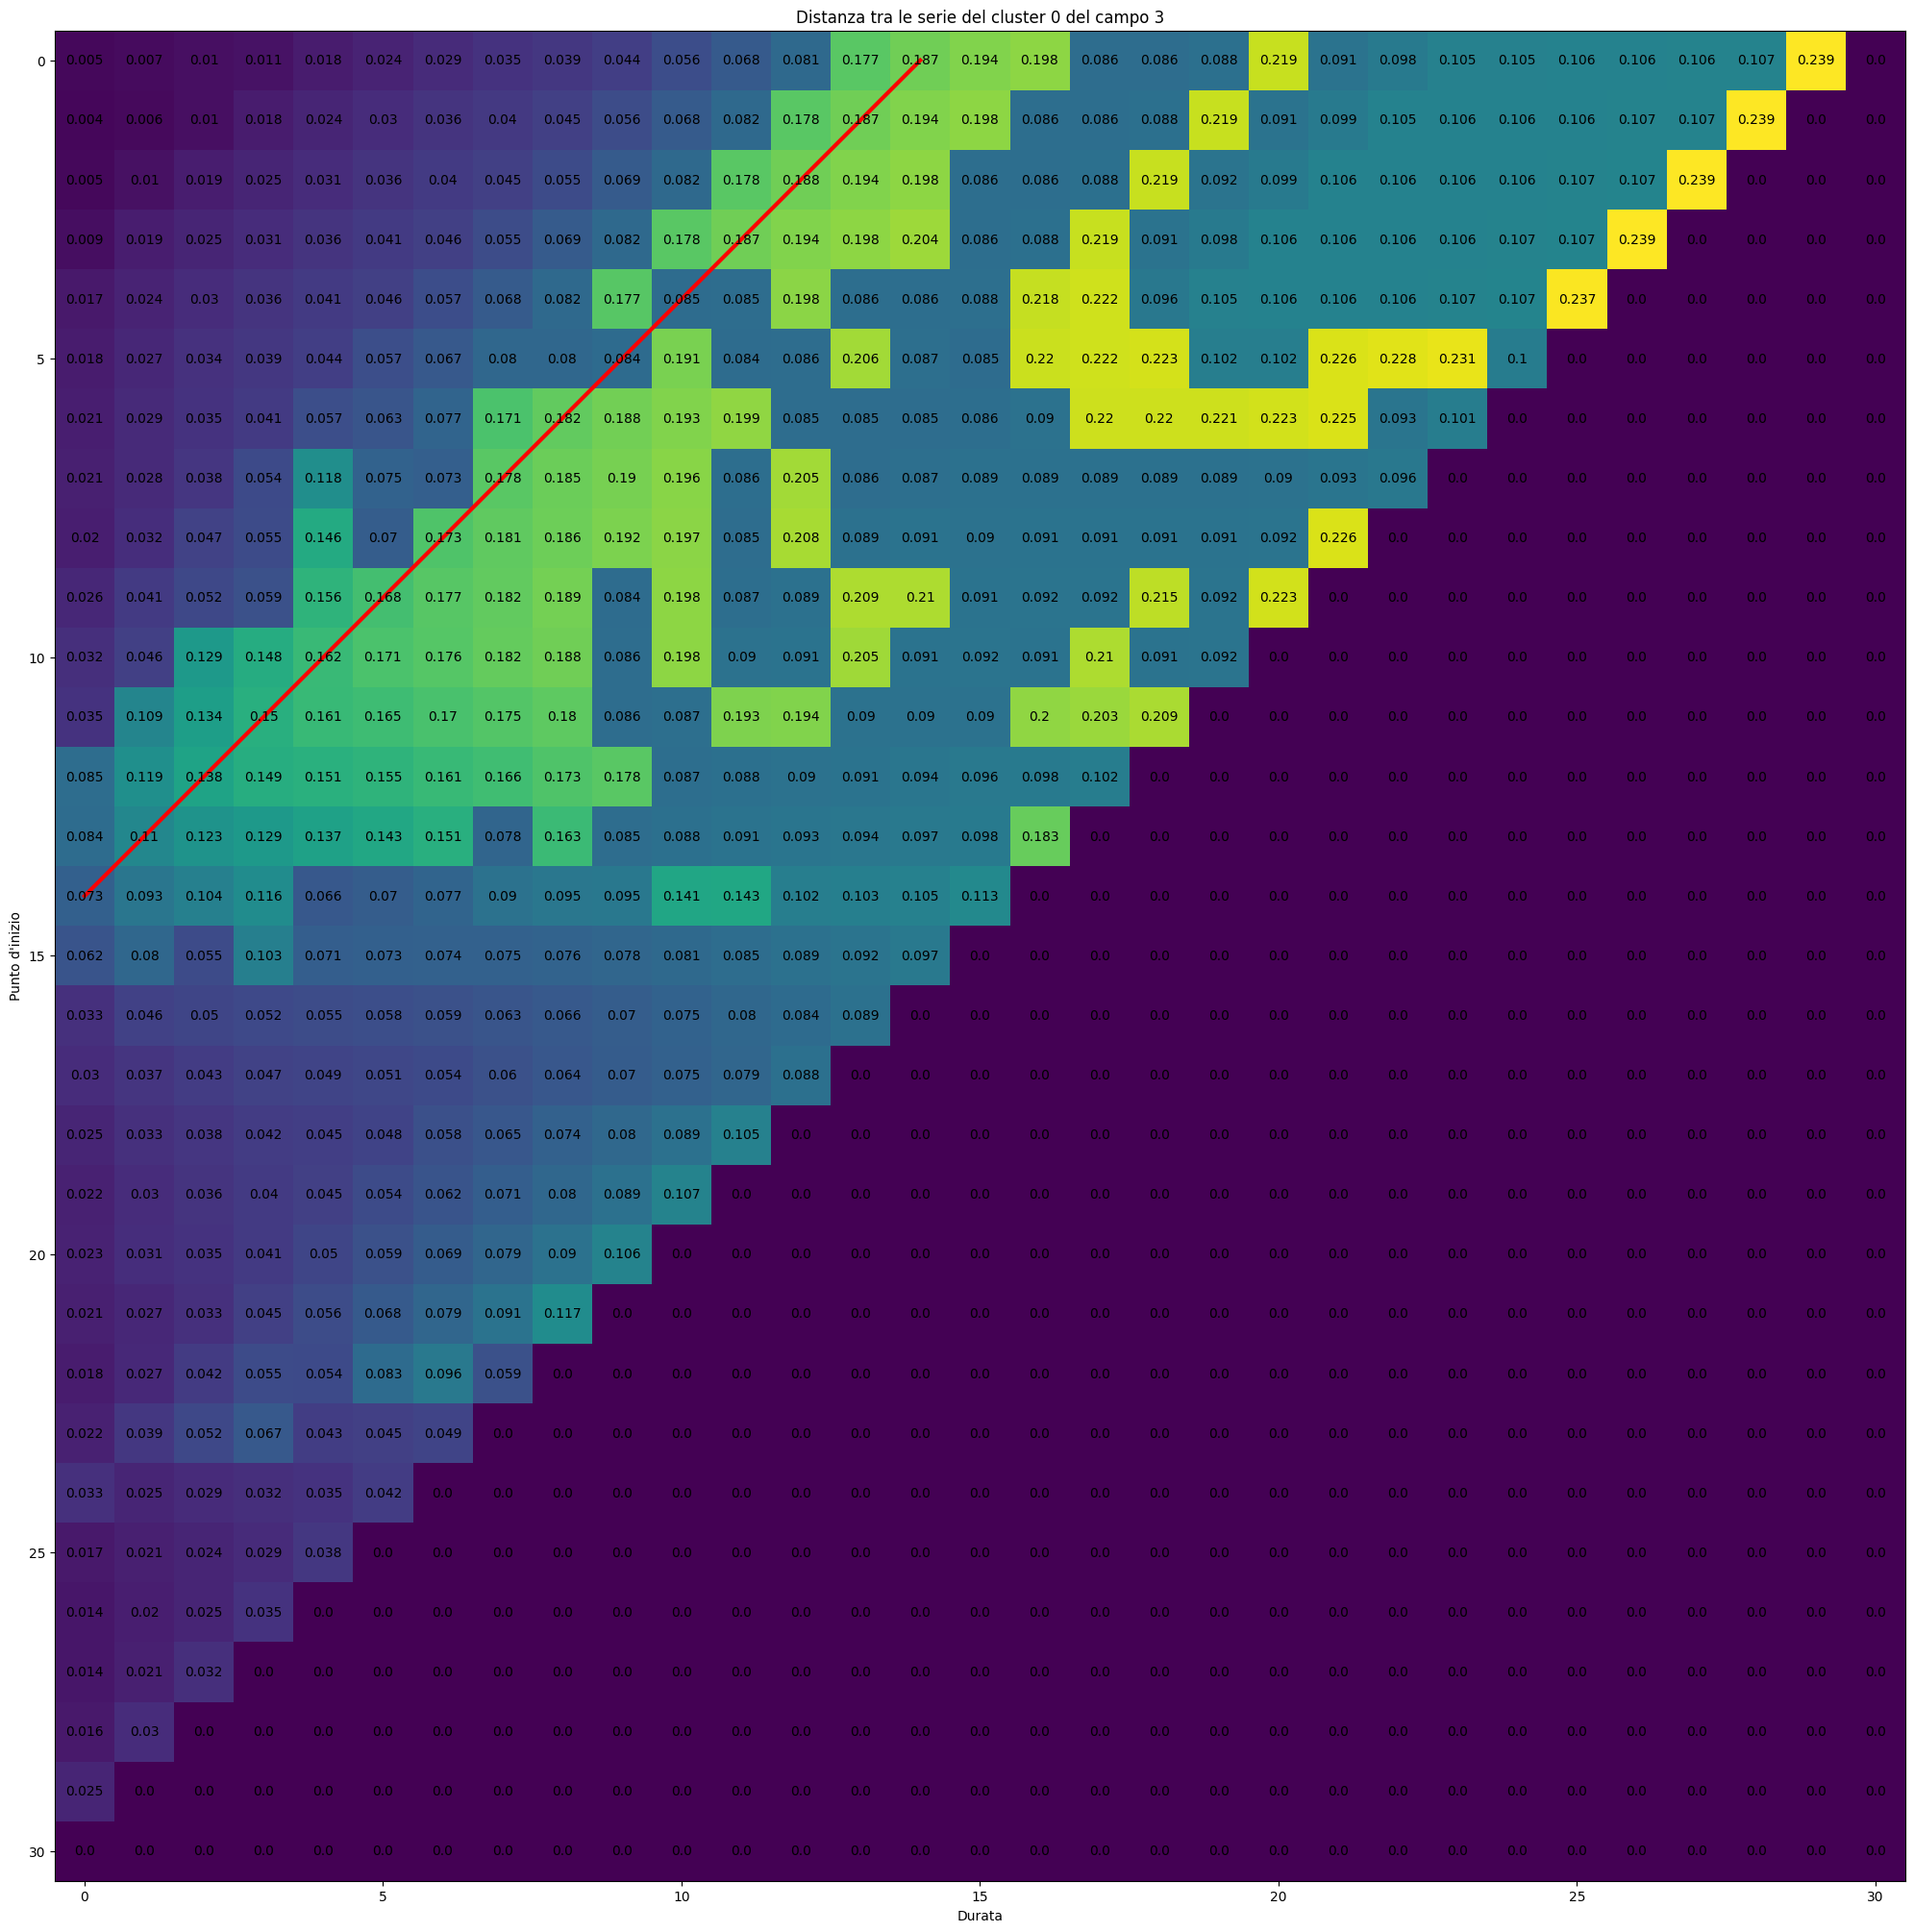

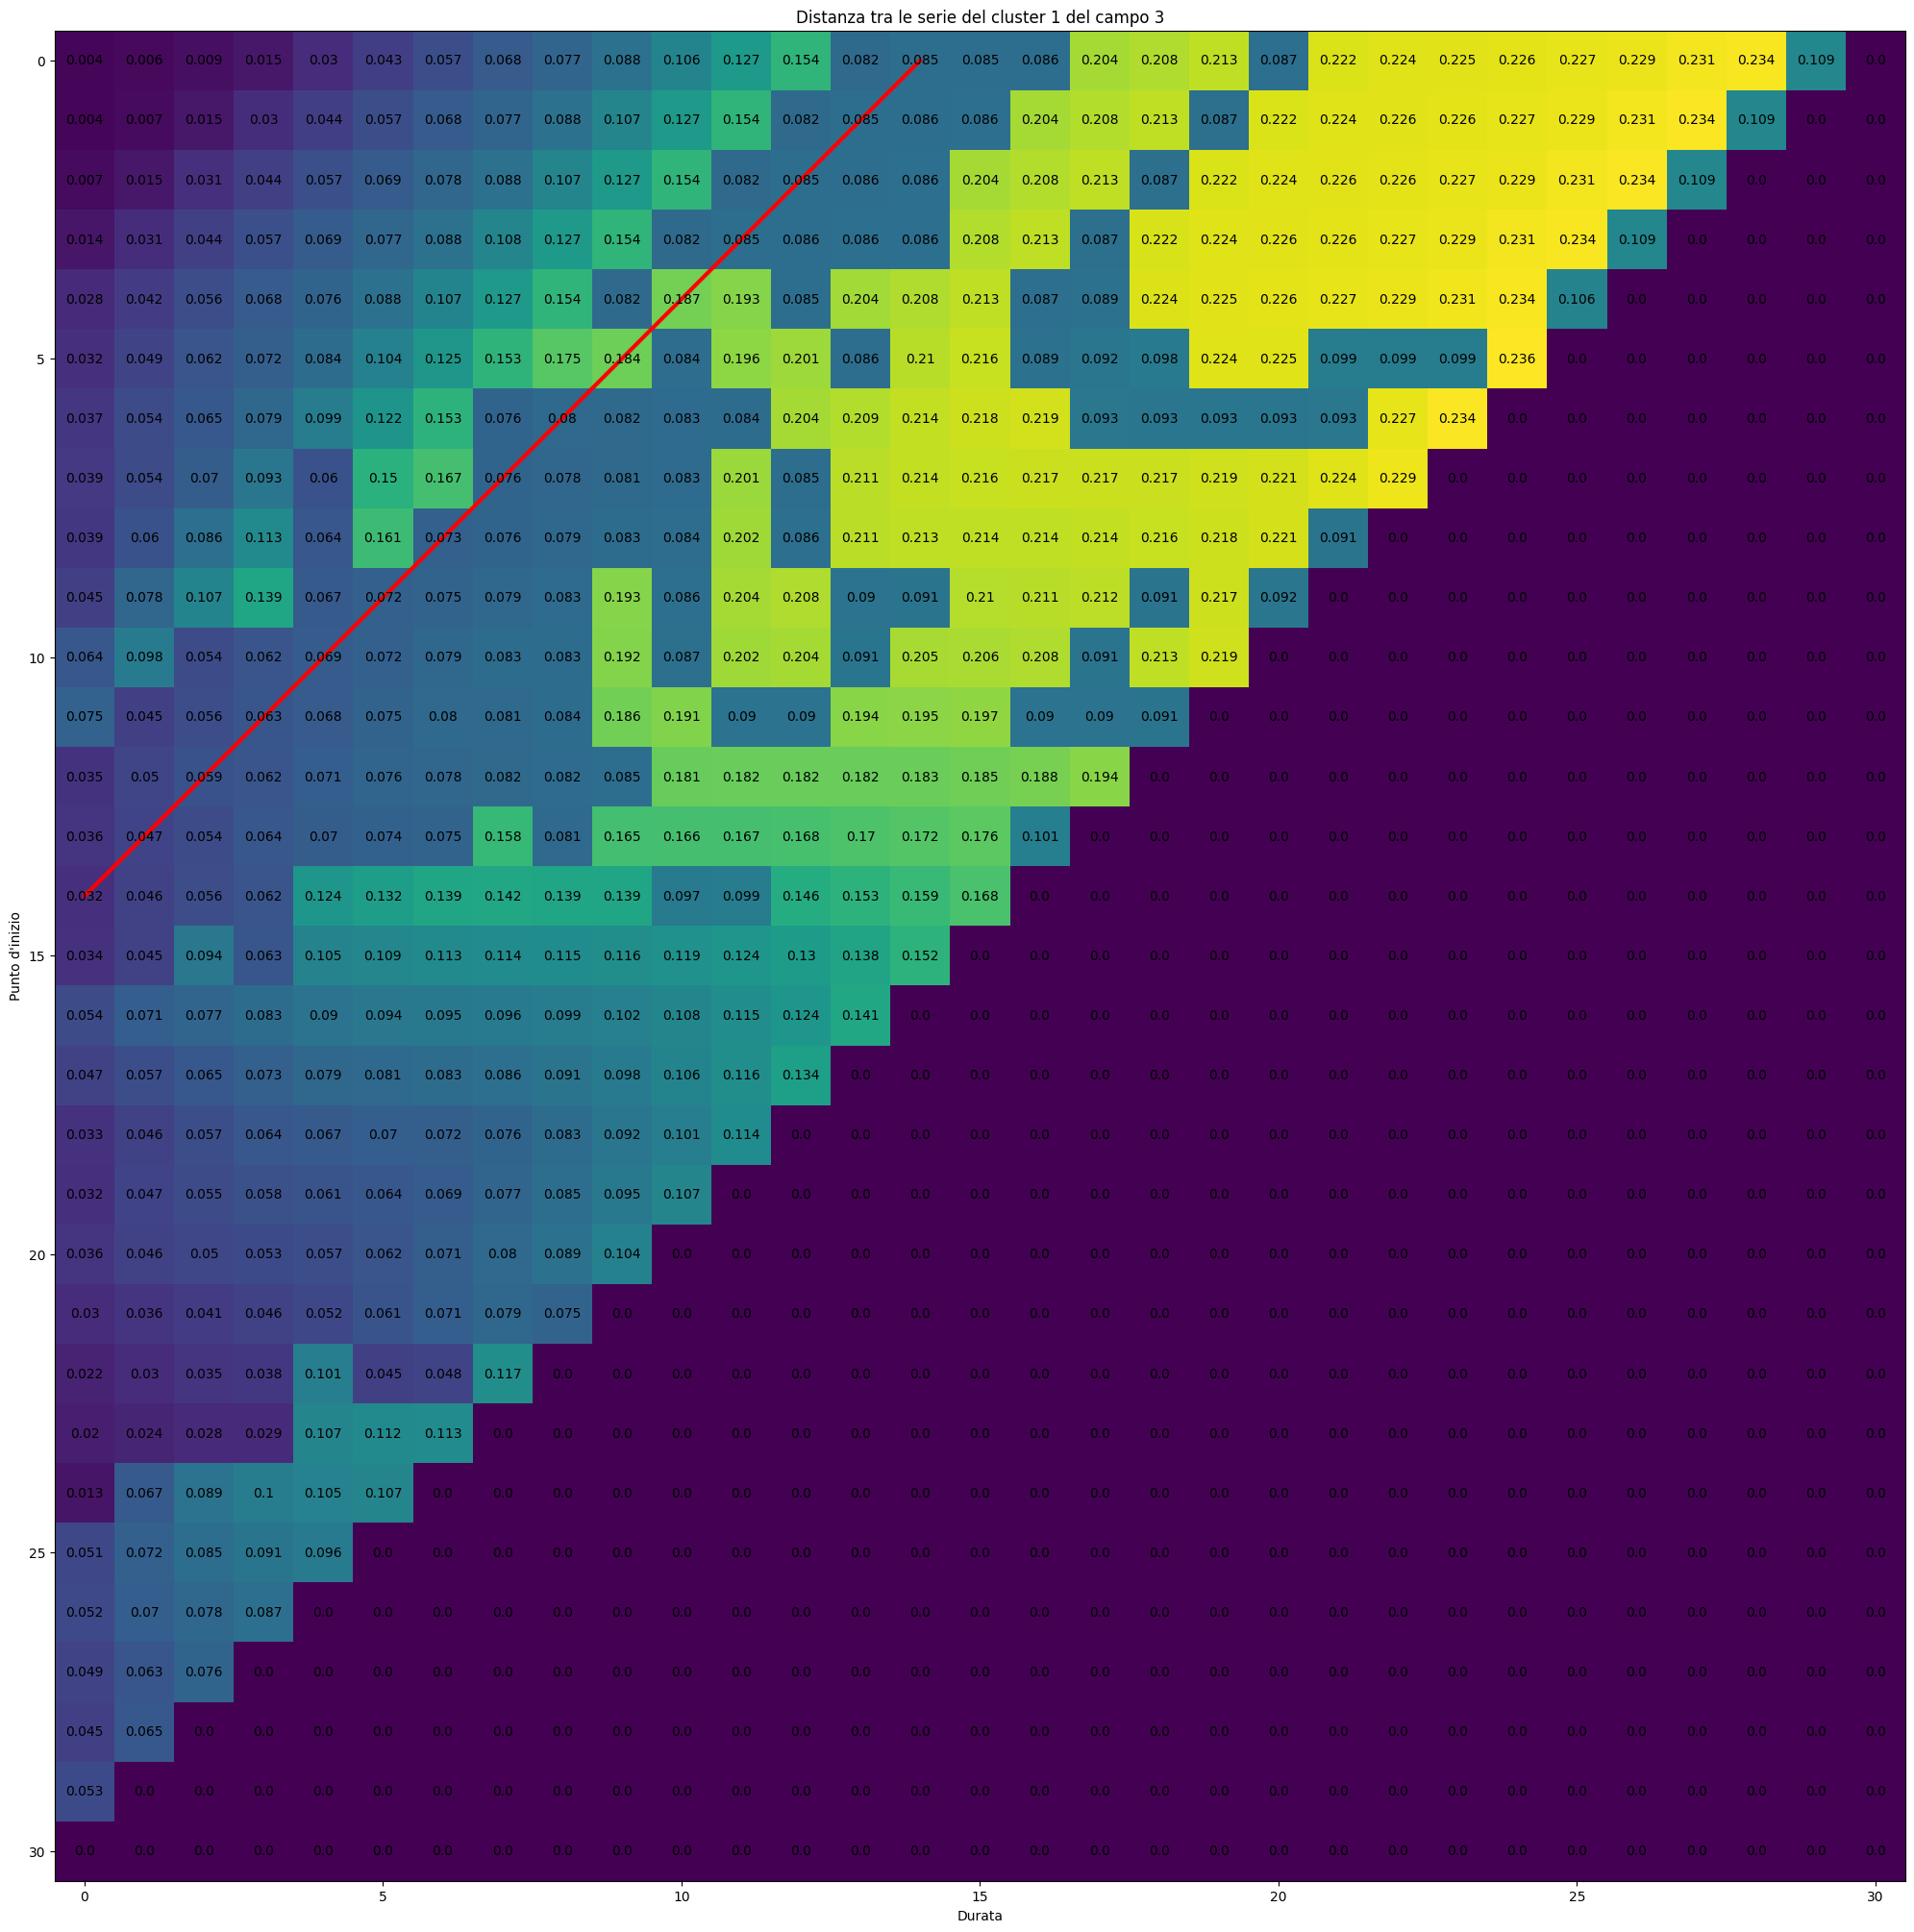

In [14]:
for p in range(0,num_cluster):
    
    fig, ax = plt.subplots()

    image = ax.imshow(coesione_3[:,:,p])


    plt.xlabel("Durata")
    plt.ylabel("Punto d'inizio")
    plt.title('Distanza tra le serie del cluster '+str(p)+' del campo 3')
    line_start = [0, np.floor(71/5)]
    line_end = [np.floor(71/5), 0]
    plt.plot(line_start, line_end, color="red", linewidth=3)

    fig.set_size_inches(25,25)
    for i in range(0,coesione_3.shape[0]):
        for j in range(0,coesione_3.shape[1]):
            c = np.round(coesione_3[i,j,p],decimals=3)
            ax.text(j, i, str(c), va='center', ha='center')
            #ax.text(j,(i+0.25),str(number_elements_3[i,j,p]),va='center', ha='center')

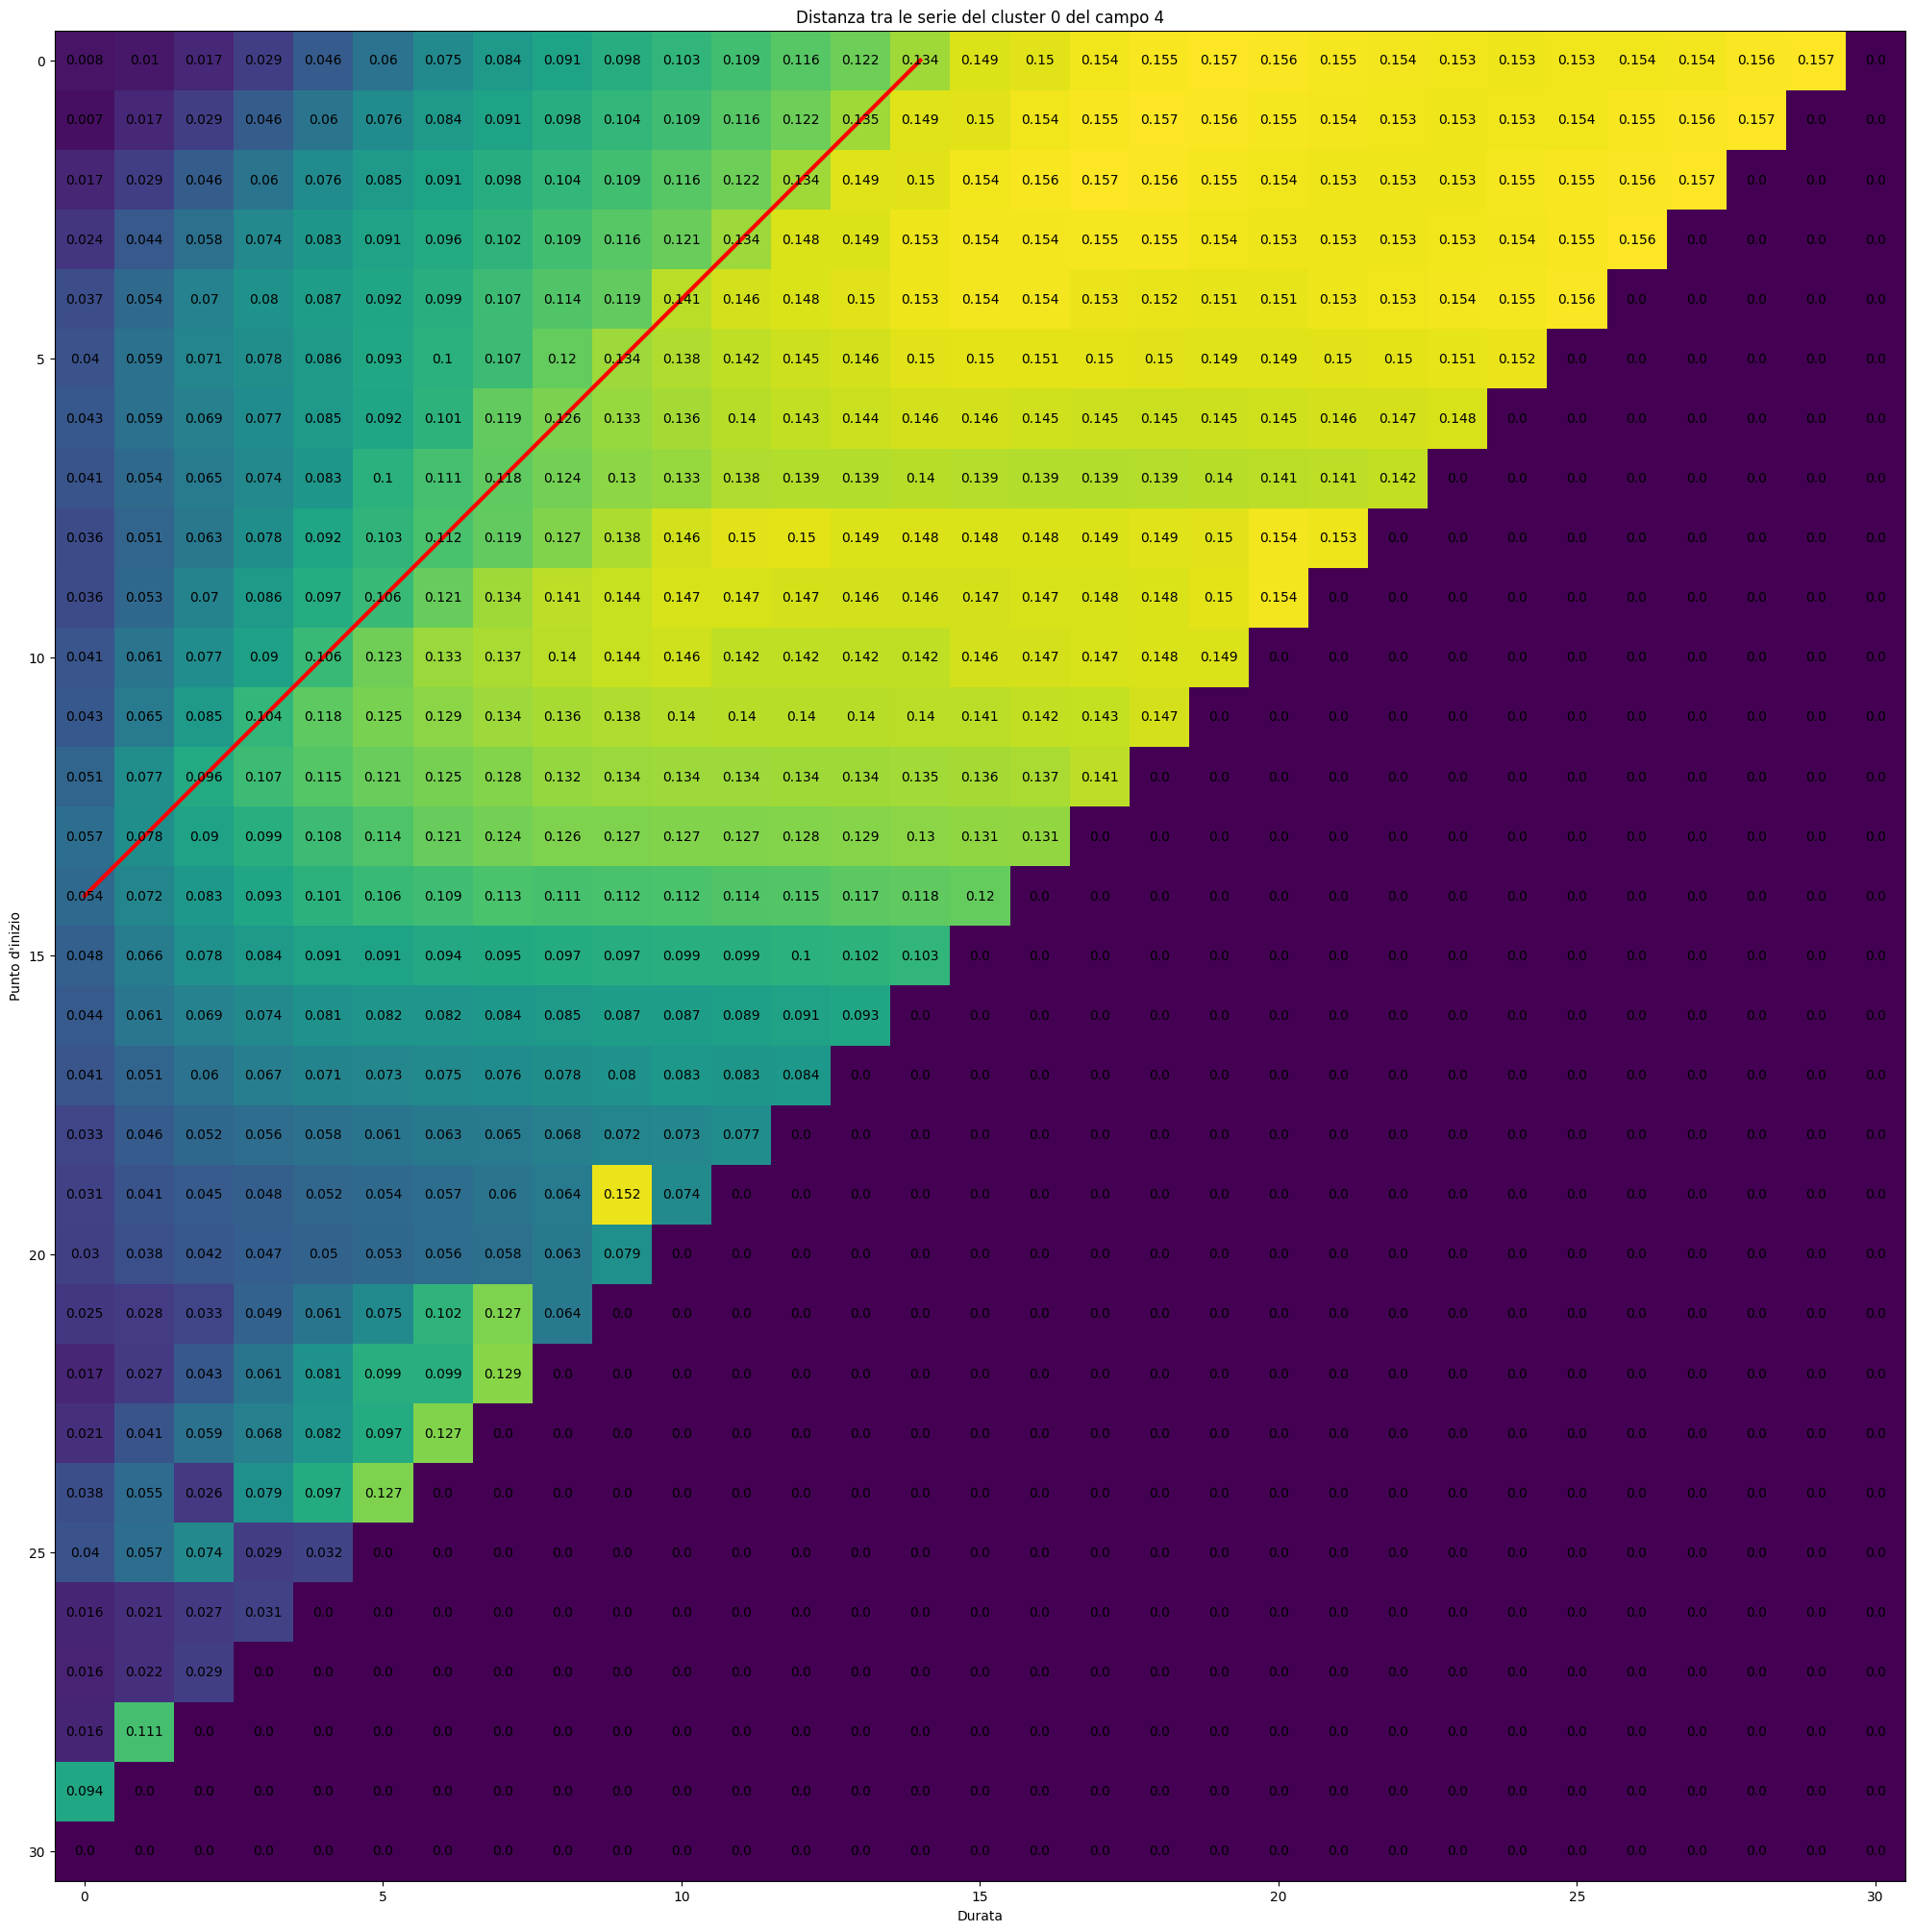

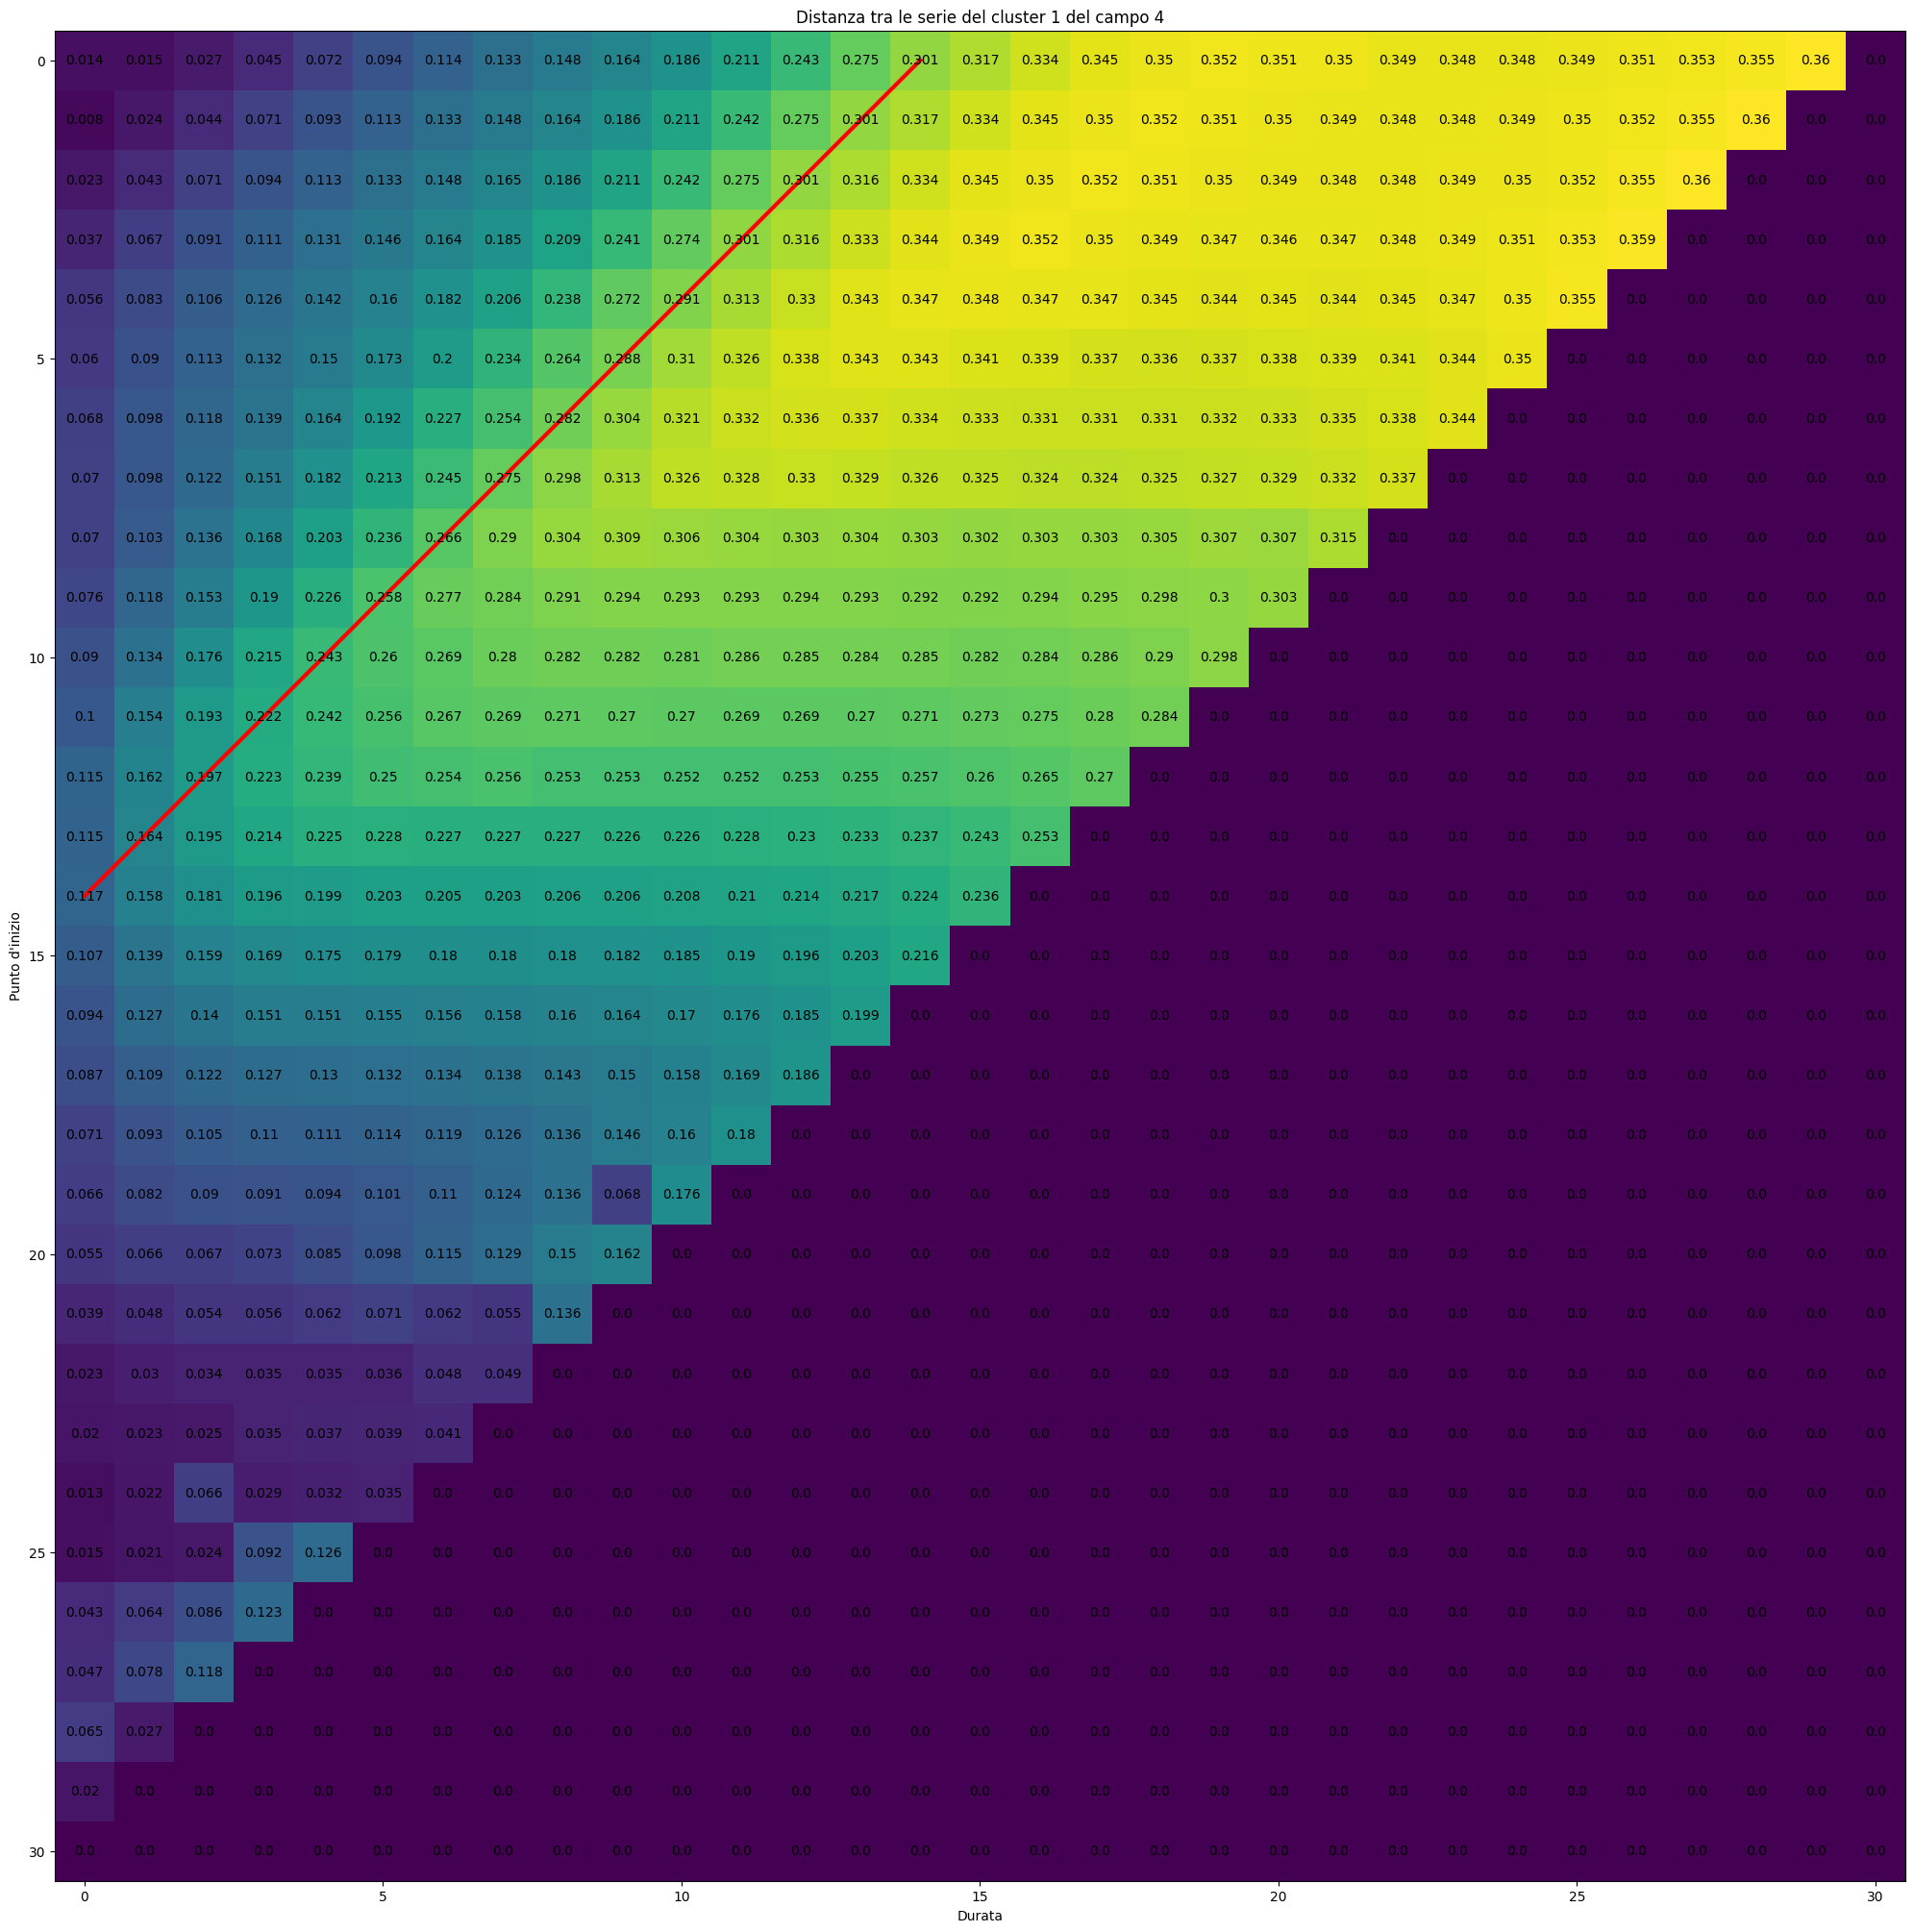

In [15]:
for p in range(0,num_cluster):
    
    fig, ax = plt.subplots()

    image = ax.imshow(coesione_4[:,:,p])


    plt.xlabel("Durata")
    plt.ylabel("Punto d'inizio")
    plt.title('Distanza tra le serie del cluster '+str(p)+' del campo 4')
    line_start = [0, np.floor(71/5)]
    line_end = [np.floor(71/5), 0]
    plt.plot(line_start, line_end, color="red", linewidth=3)

    fig.set_size_inches(25,25)
    for i in range(0,coesione_4.shape[0]):
        for j in range(0,coesione_4.shape[1]):
            c = np.round(coesione_4[i,j,p],decimals=3)
            ax.text(j, i, str(c), va='center', ha='center')
            #ax.text(j,(i+0.25),str(number_elements_3[i,j,p]),va='center', ha='center')

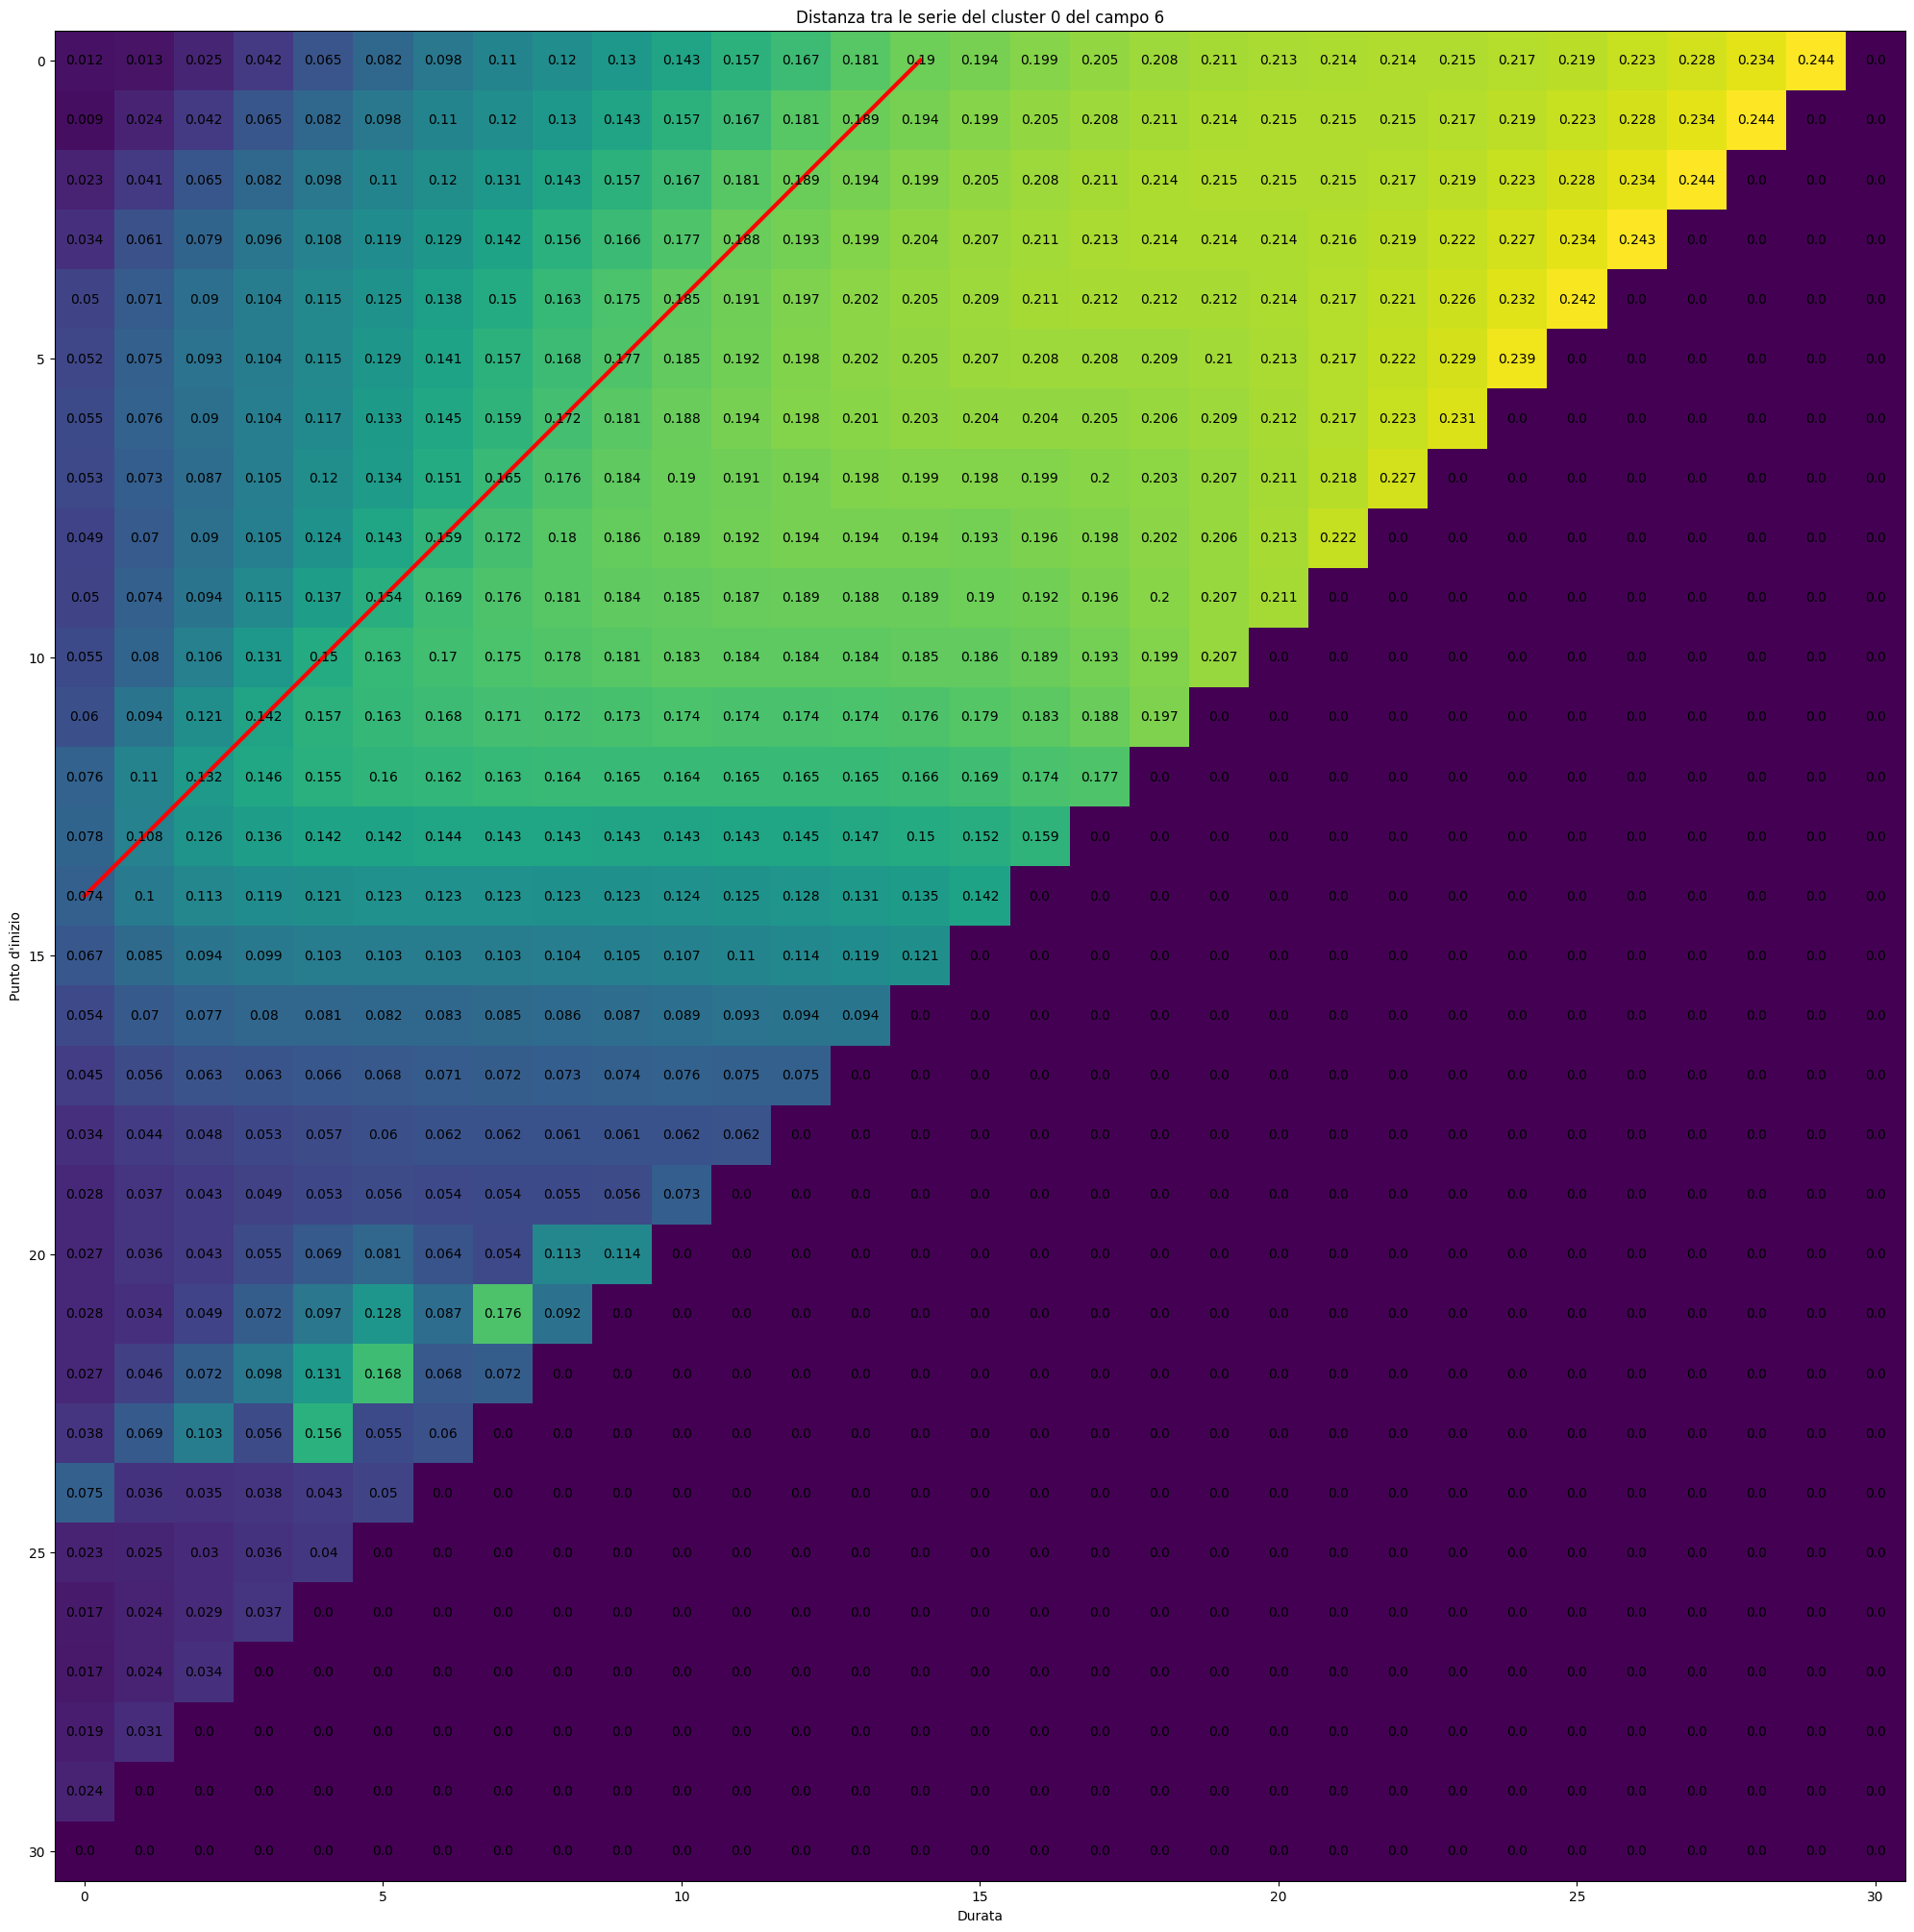

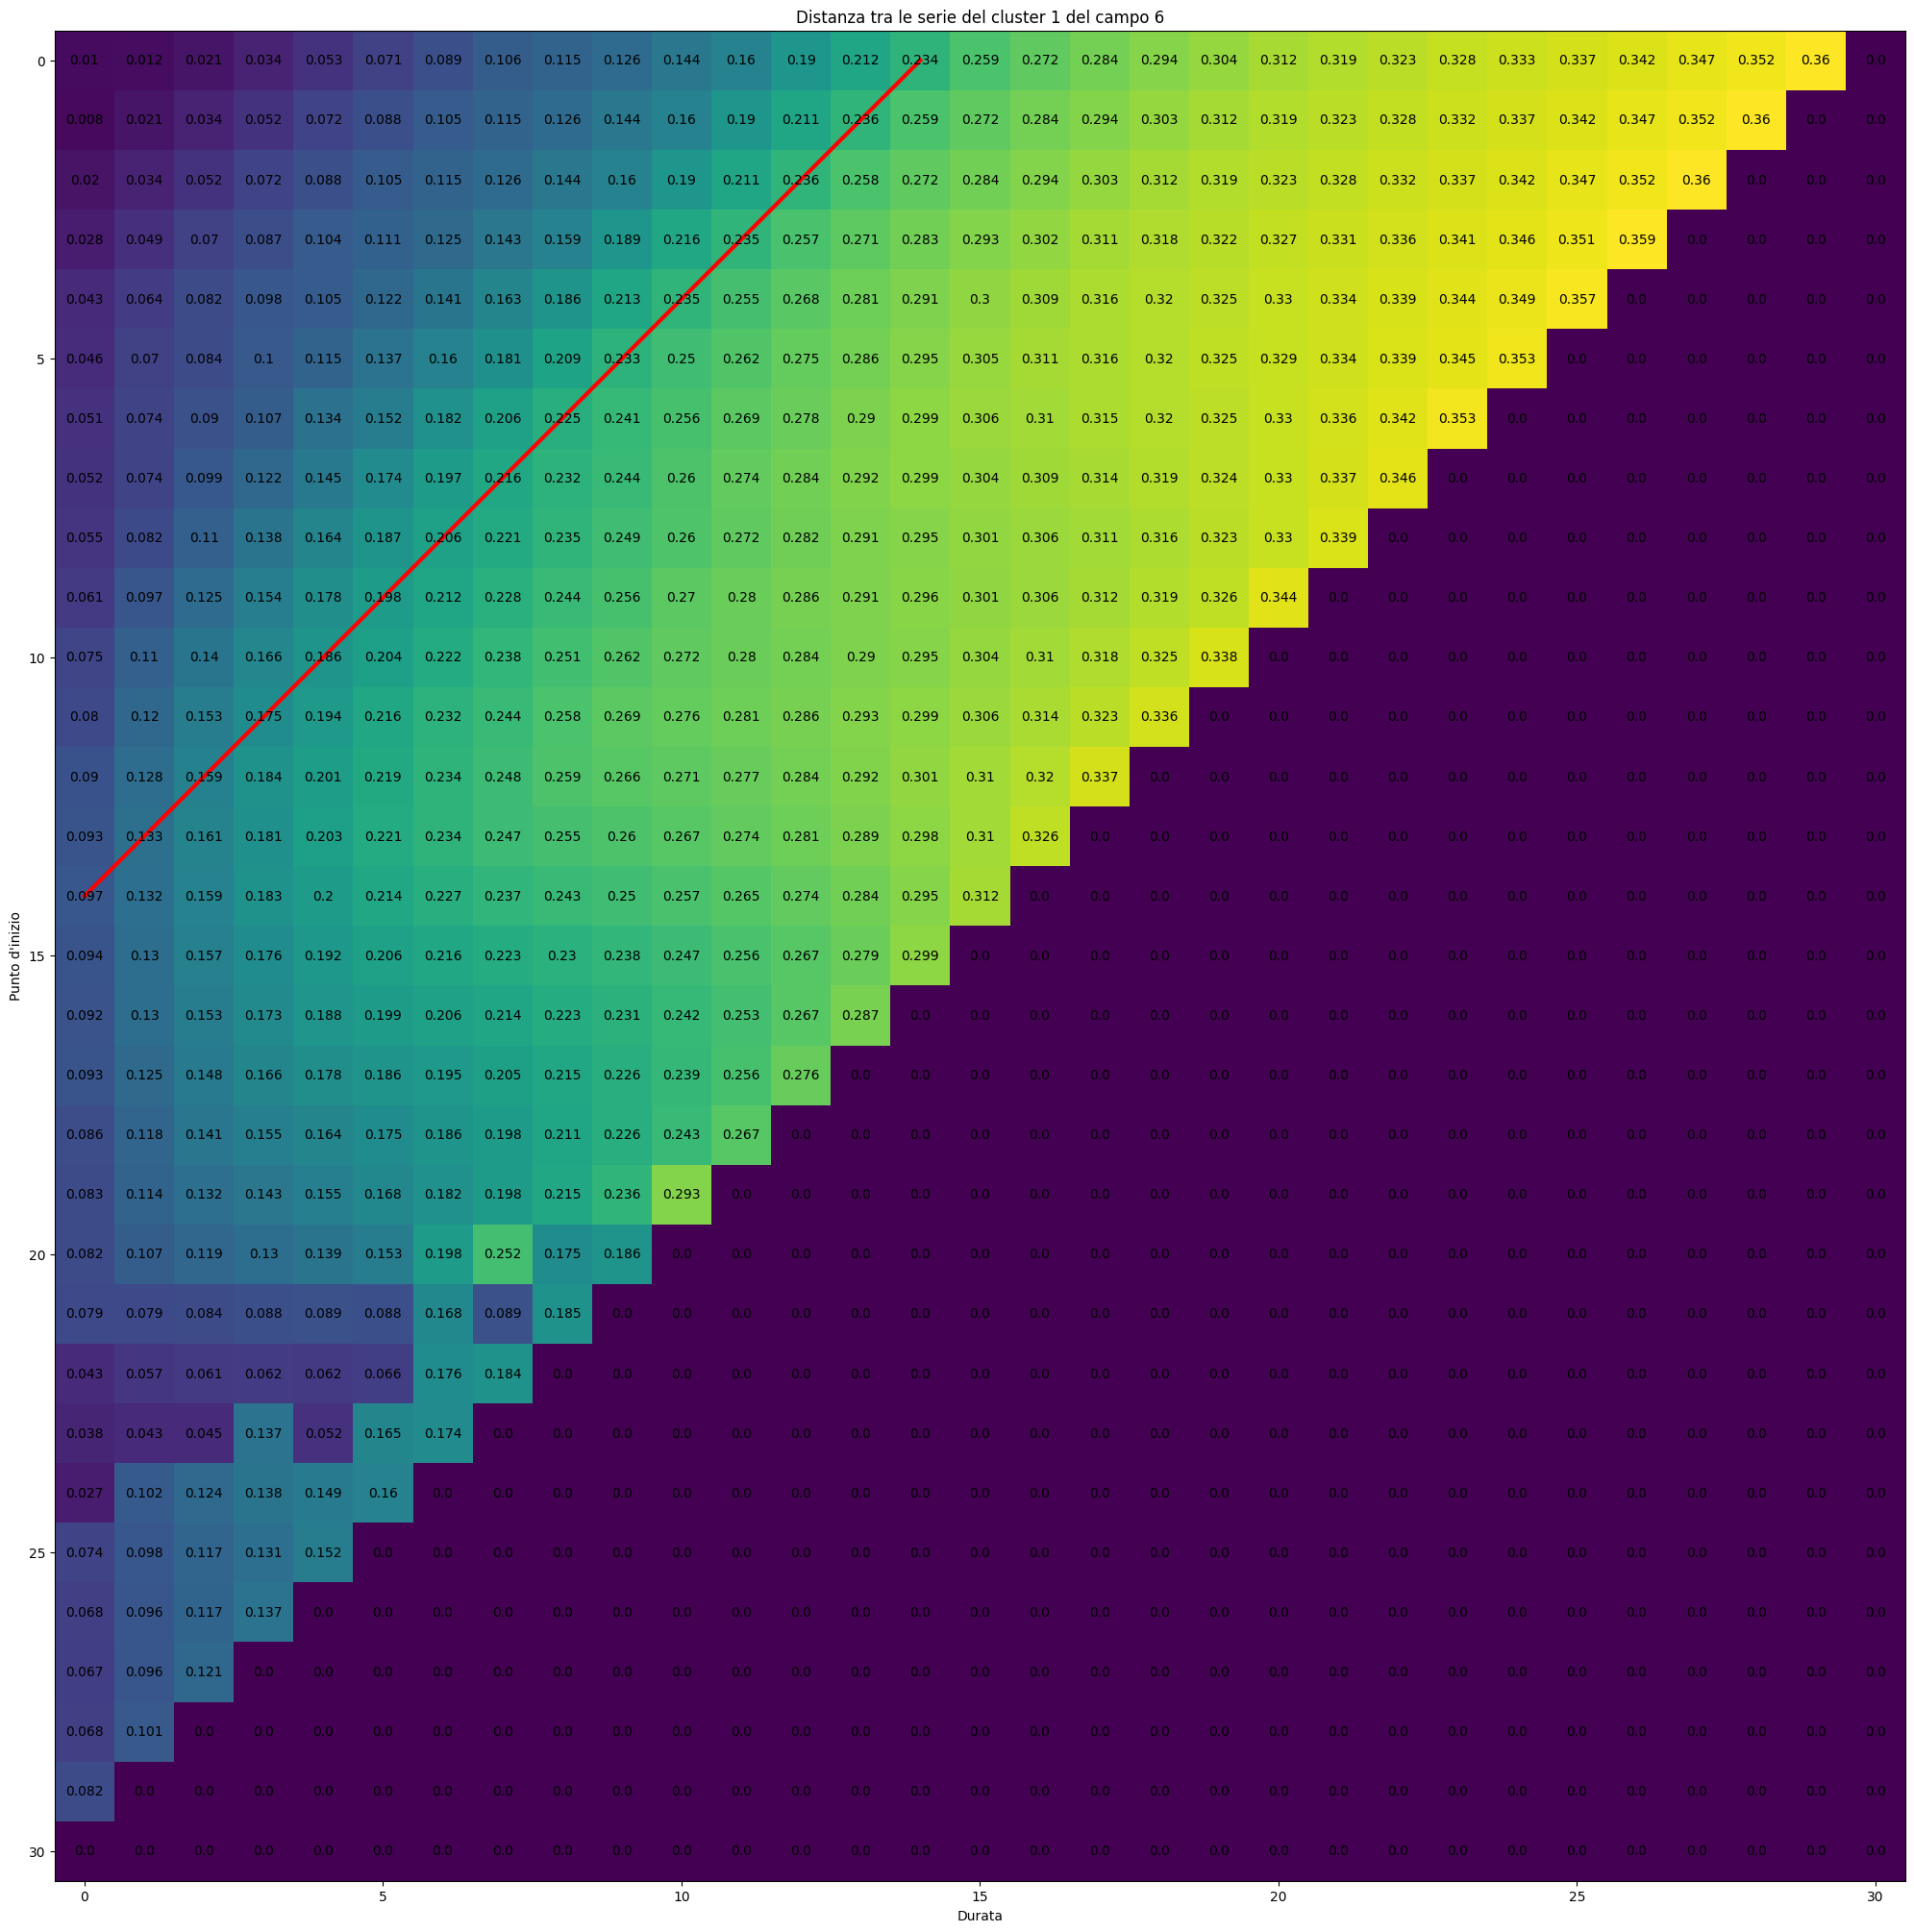

In [16]:
for p in range(0,num_cluster):
    
    fig, ax = plt.subplots()

    image = ax.imshow(coesione_6[:,:,p])


    plt.xlabel("Durata")
    plt.ylabel("Punto d'inizio")
    plt.title('Distanza tra le serie del cluster '+str(p)+' del campo 6')
    line_start = [0, np.floor(71/5)]
    line_end = [np.floor(71/5), 0]
    plt.plot(line_start, line_end, color="red", linewidth=3)

    fig.set_size_inches(25,25)
    for i in range(0,coesione_6.shape[0]):
        for j in range(0,coesione_6.shape[1]):
            c = np.round(coesione_6[i,j,p],decimals=3)
            ax.text(j, i, str(c), va='center', ha='center')
            #ax.text(j,(i+0.25),str(number_elements_3[i,j,p]),va='center', ha='center')

# Andiamo a rappresentare i valori di separazione dentro delle matrici

0.6039062631700537
6817658.453375296
0.9689997910741178
0.7341757311103796
3920240.475513273
5965038.859994134
0.6478237326171934
2667896.196799947
0.6631804367265749
3319654.985699053
0.6908354506420424
2361643.4425894413
0.6968321476883259
0.7903433334590052
0.7827132723799775
2308124.2334662825
2526246.9873347534
3865634.5544282068
0.8451286186103176
2923545.1046428336
0.8554573791135177
3067435.1917980667
3174534.7128552888
4176969.49726563
7554372.811632332
0.8675384083142
7712520.902185733
3163443.9096670216
3225617.5980728096
3341880.937540434
0.8174578353512596
0.6858966955349556
0.628704505554015
5921462.280990766
5745721.853560282
3151888.731897775
0.6412133924521872
0.6539591904288373
3274889.7305070944
0.6877868892782085
3315649.734082948
3467976.4663388184
0.7886520275065116
0.780821710545512
0.7822890346195158
0.8018636426430026
6548349.795140374
1988290.377036187
2870450.448888662
7095556.960155111
0.851815492977667
4180892.1452882593
7447427.666615458
6581696.354044804


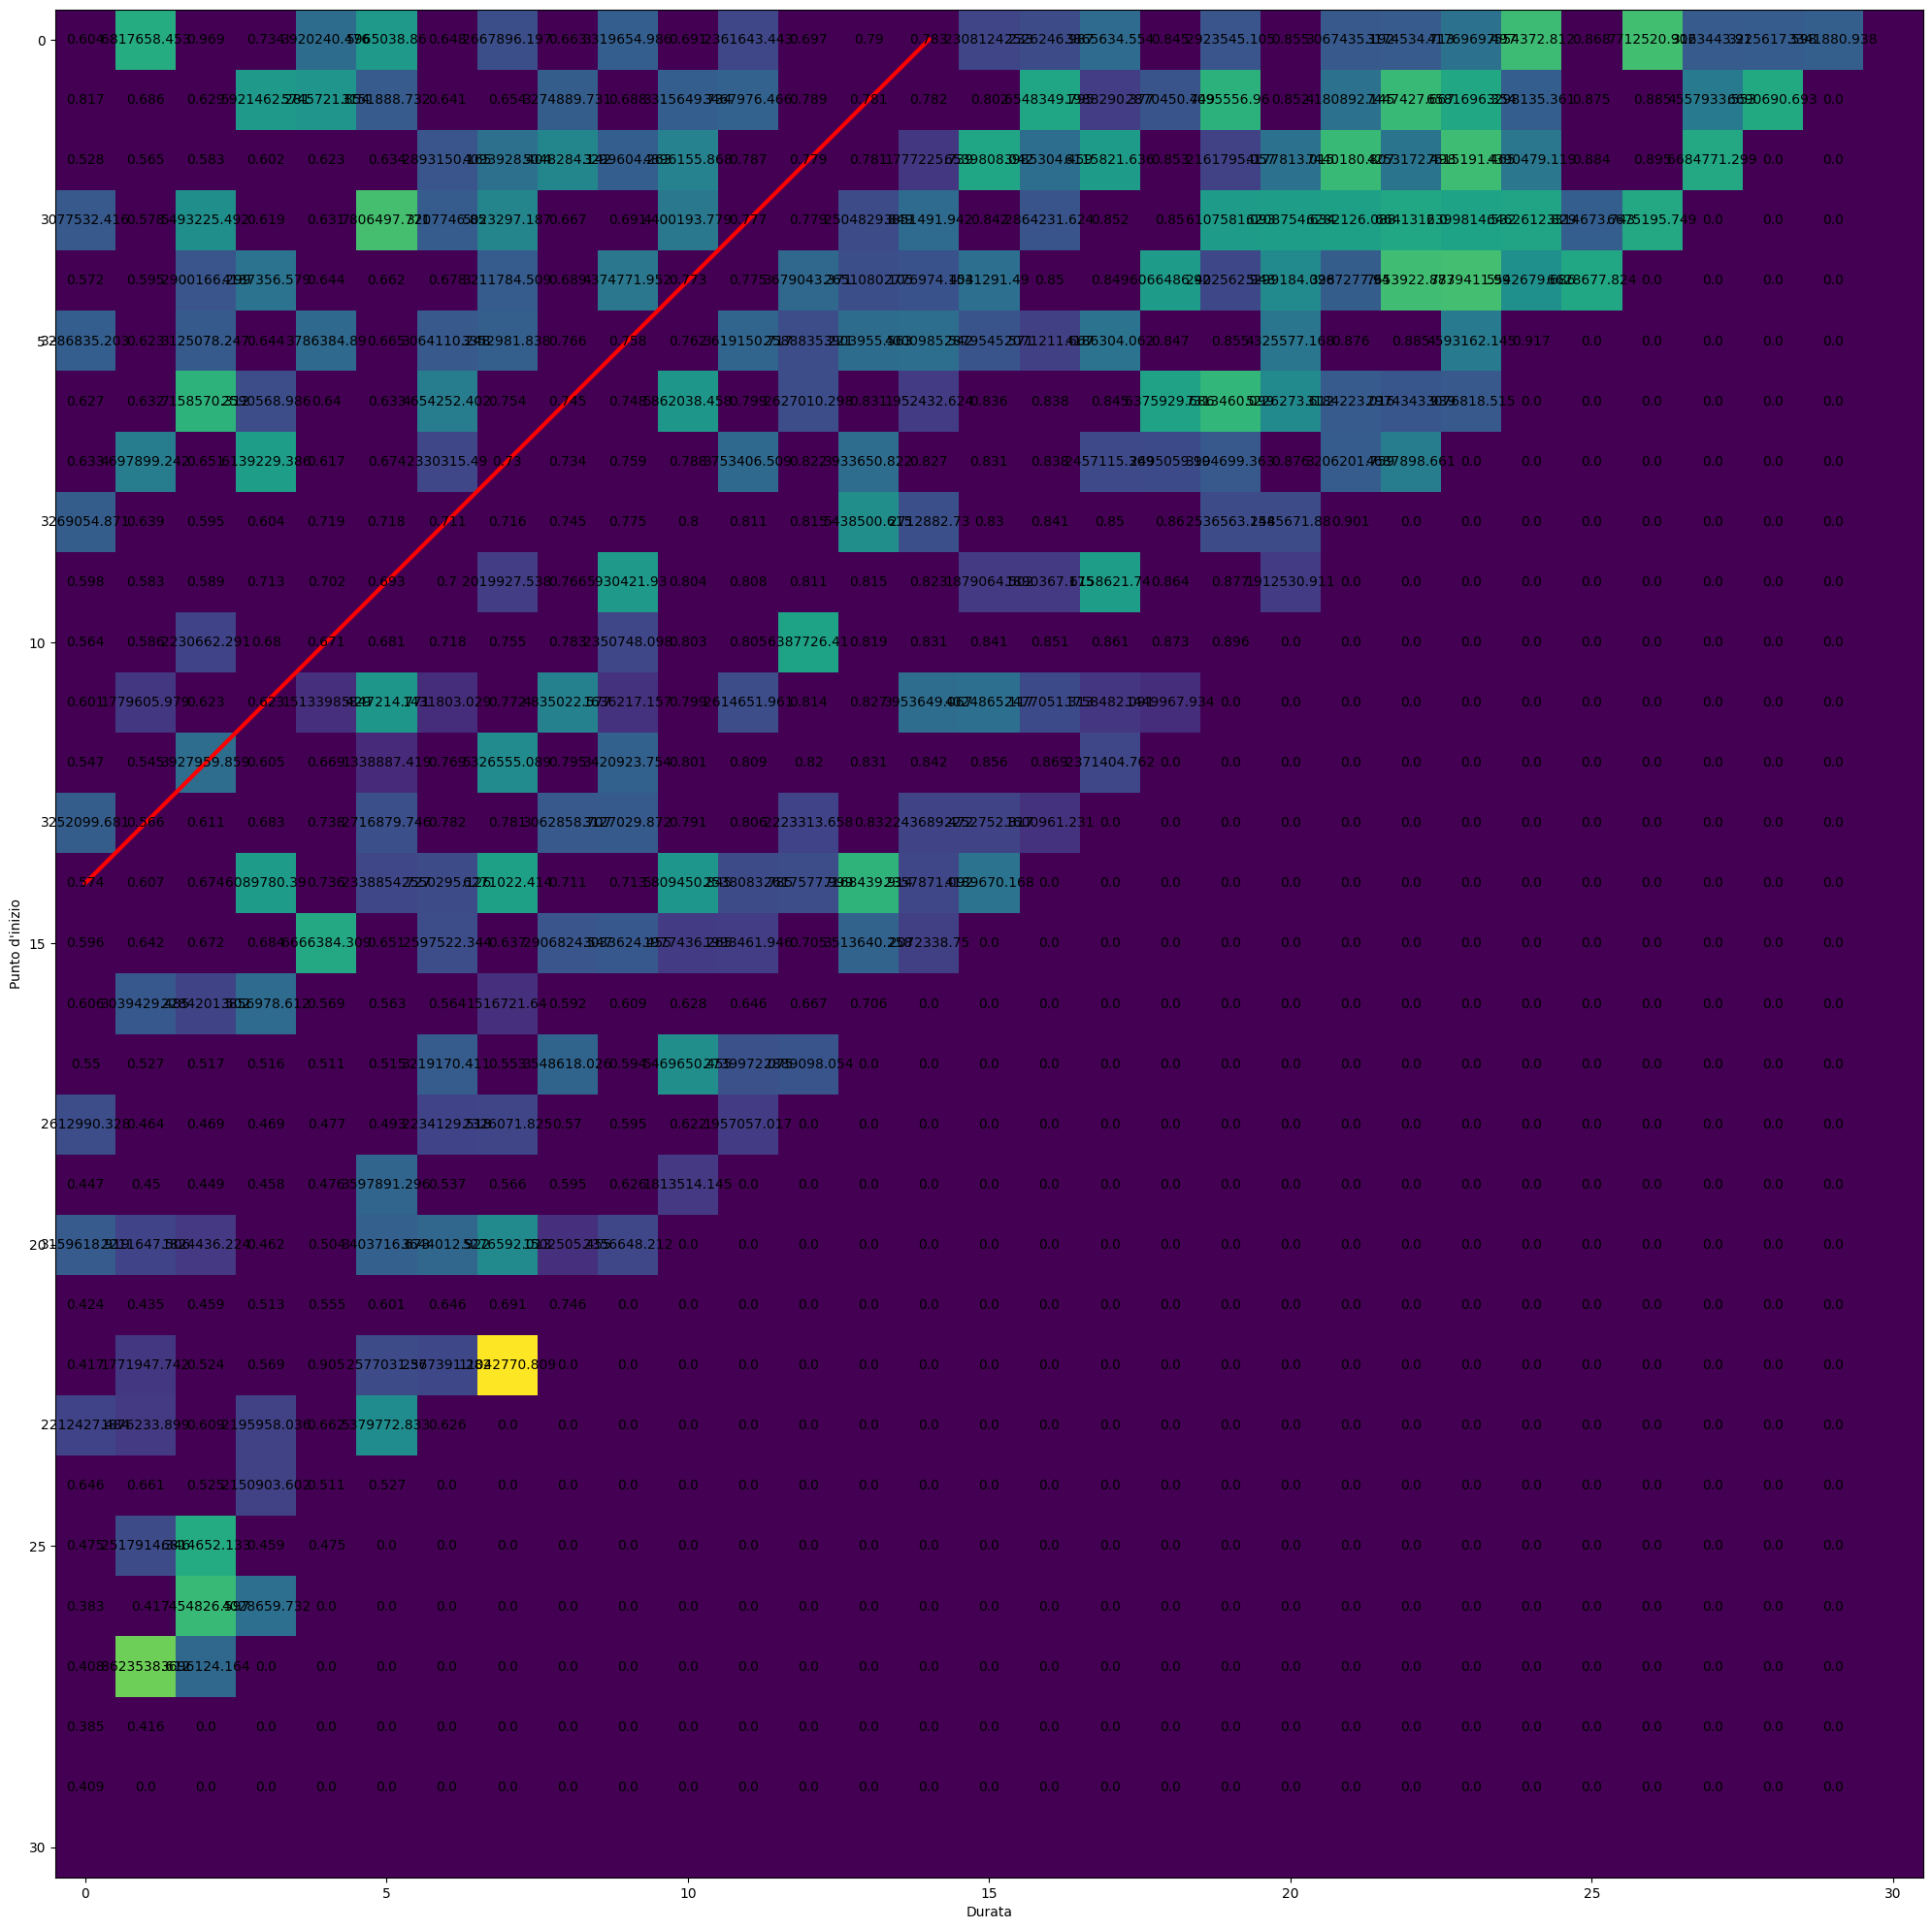

In [17]:

fig, ax = plt.subplots()
image = ax.imshow(davisBouldin3[:,:])
line_start = [0, np.floor(71/5)]
line_end = [np.floor(71/5), 0]
plt.plot(line_start, line_end, color="red", linewidth=3)
plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(25,25)
for i in range(x):
    for j in range(y):
        c = np.round(davisBouldin3[i,j],decimals=3)
        print(davisBouldin3[i,j])
        ax.text(j, i, str(c), va='center', ha='center')
plt.show()

0.6058225295695941
10091866.133895764
0.5435639069867478
0.5057823575008631
5149311.056584955
0.491530142118063
11140252.13033013
9221182.120802306
0.5026085070693698
0.5114204491276367
0.5275723544405657
0.5445140936371012
0.5639463275697756
6894305.981841424
7645733.607863904
0.6067046757231287
0.6164405033678203
3306478.7913363865
4631826.437659245
3405890.759984995
6866399.4602655275
6961978.126652916
7018747.32360559
4995652.814413923
7102211.1418058835
7597515.10937603
5086505.194633235
2570878.019935707
0.6881586177020044
0.6959551693977407
11619201.15639148
5612572.725936761
0.4819384120603021
0.4832461720960386
0.4849817091160783
0.4864051557186255
4550619.3447334245
0.5003013381111826
0.5092042621177596
9180669.468387997
0.5431908566320436
0.5627855847332884
9444015.6866268
0.5974807797458513
3130360.892282316
0.6157387837289512
6373084.555932103
3342581.5556973927
0.636302628245137
0.6471181610550406
6955186.720379628
0.6616005361901782
4990946.315530266
0.6705235525243292
7

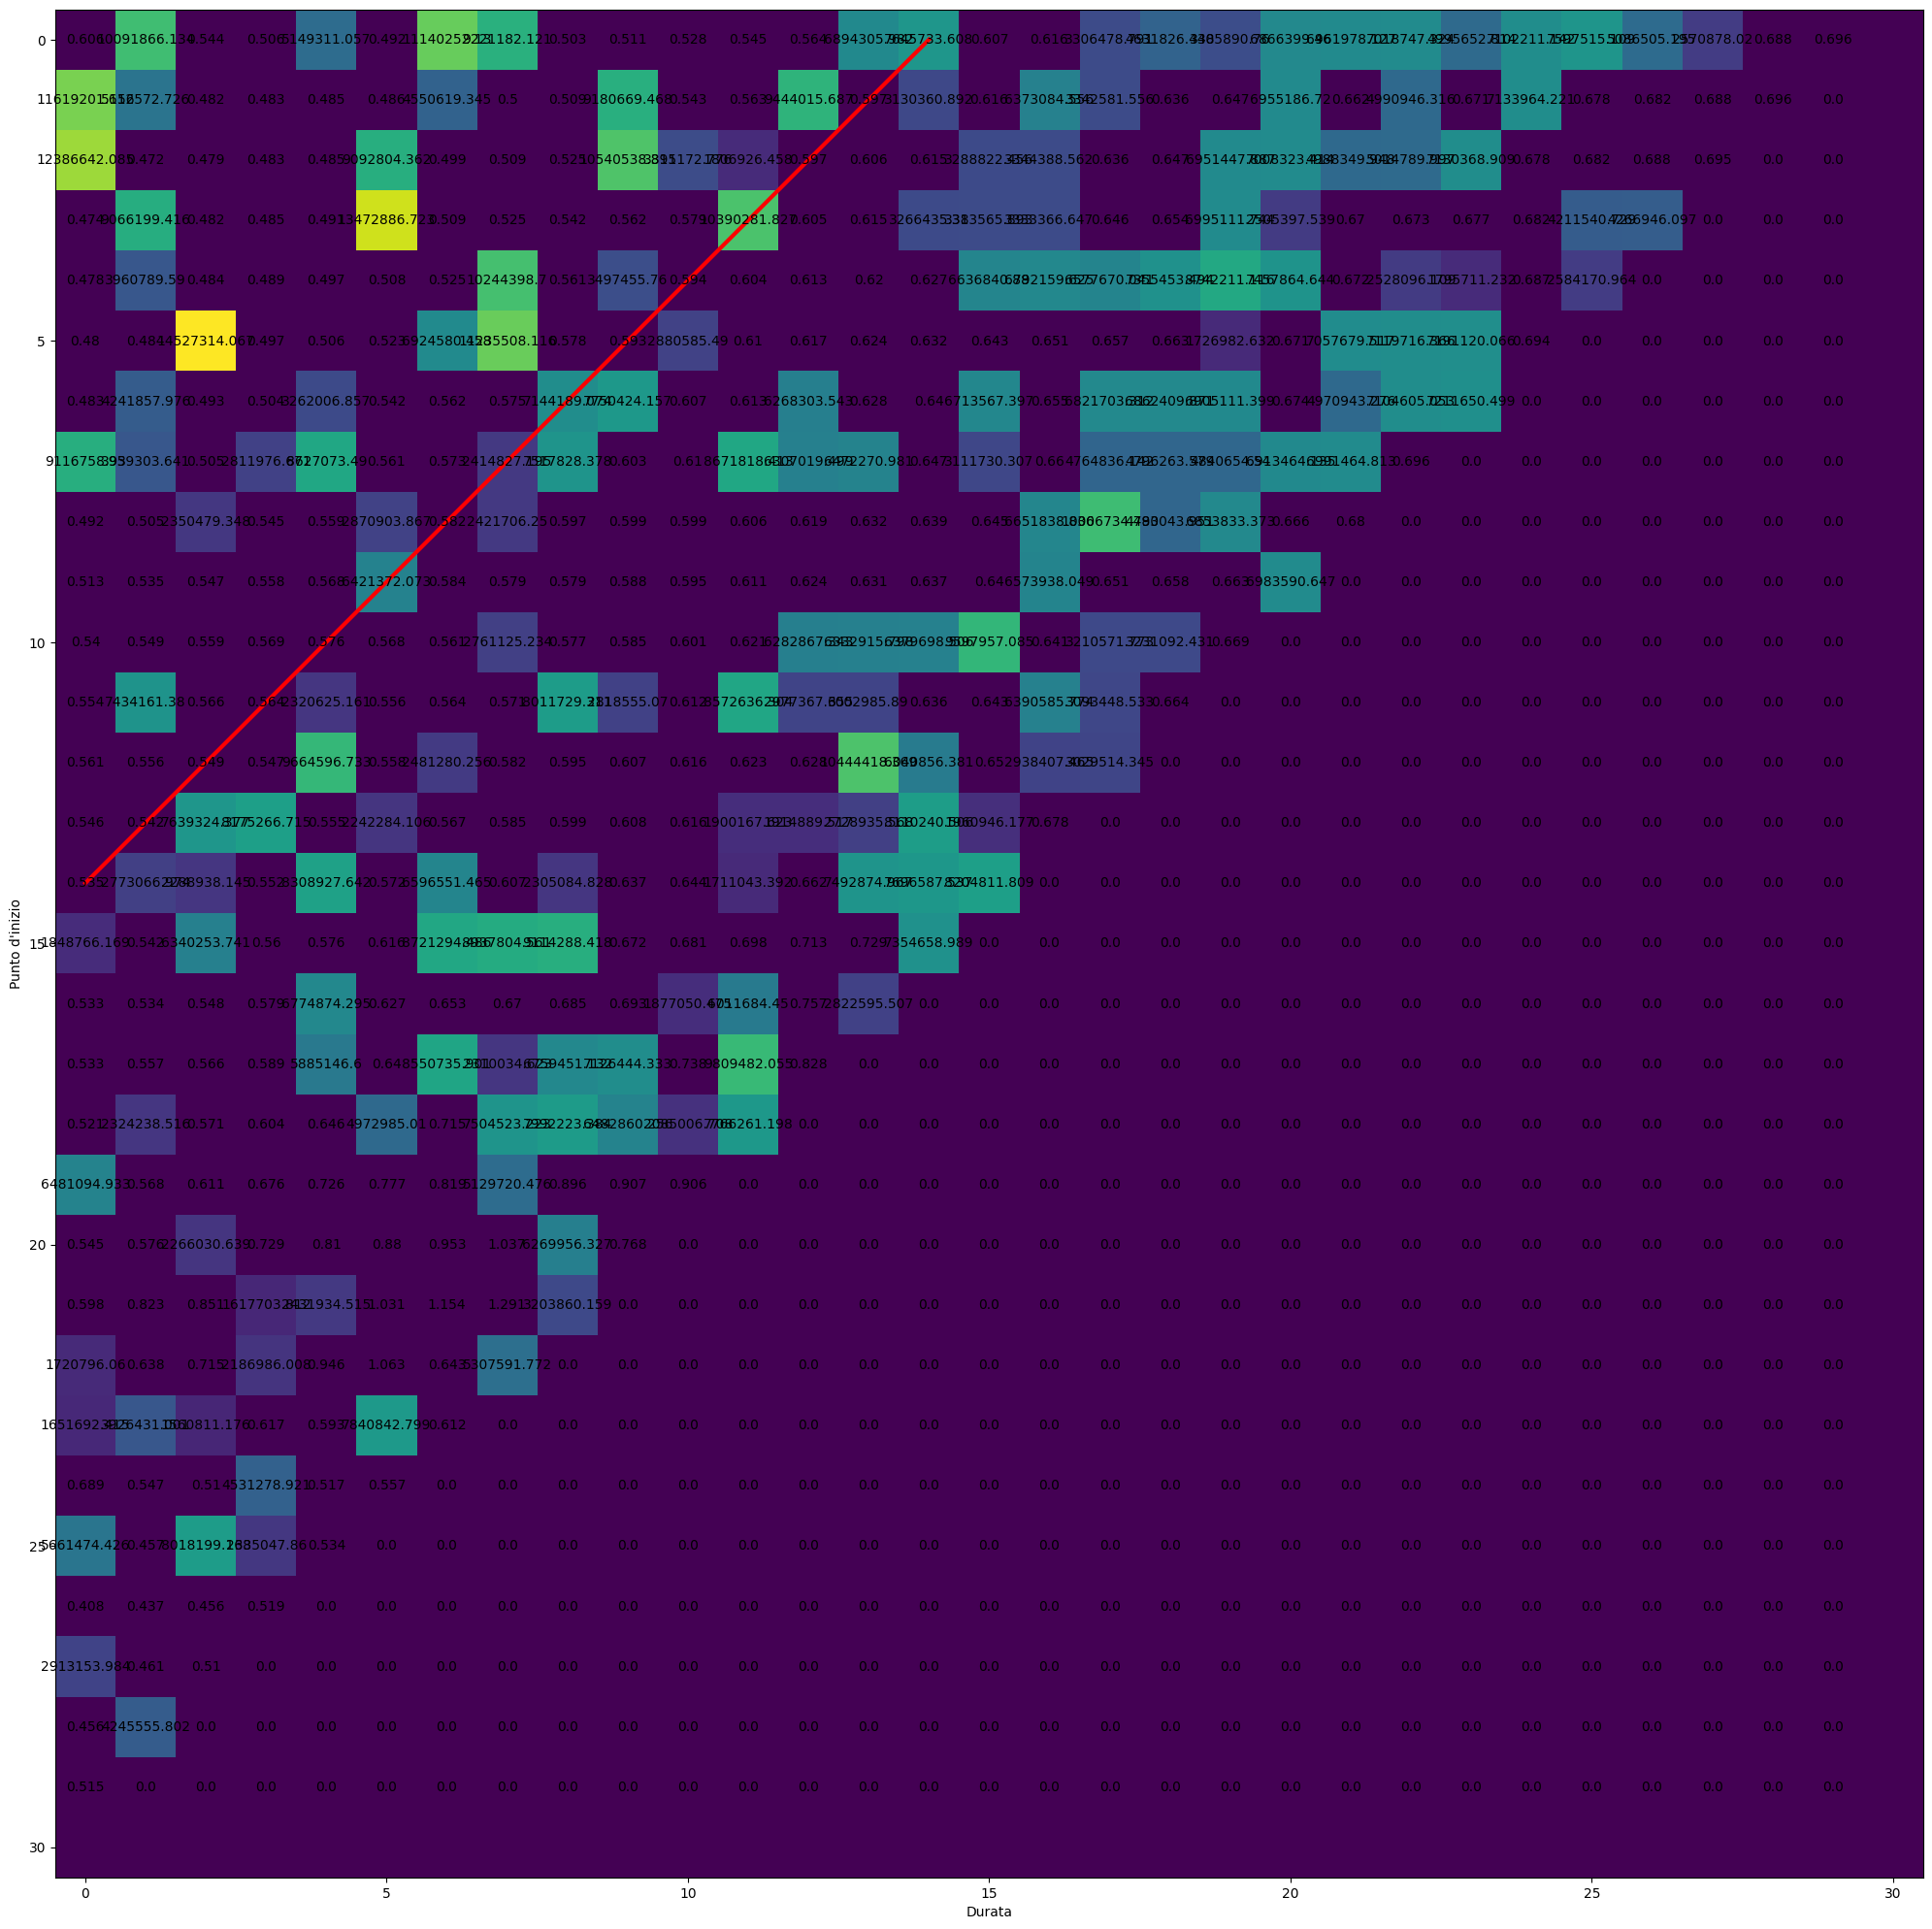

In [18]:
fig, ax = plt.subplots()
image = ax.imshow(davisBouldin4[:,:])
line_start = [0, np.floor(71/5)]
line_end = [np.floor(71/5), 0]
plt.plot(line_start, line_end, color="red", linewidth=3)
plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(25,25)
for i in range(x):
    for j in range(y):
        c = np.round(davisBouldin4[i,j],decimals=3)
        print(davisBouldin4[i,j])
        ax.text(j, i, str(c), va='center', ha='center')
plt.show()

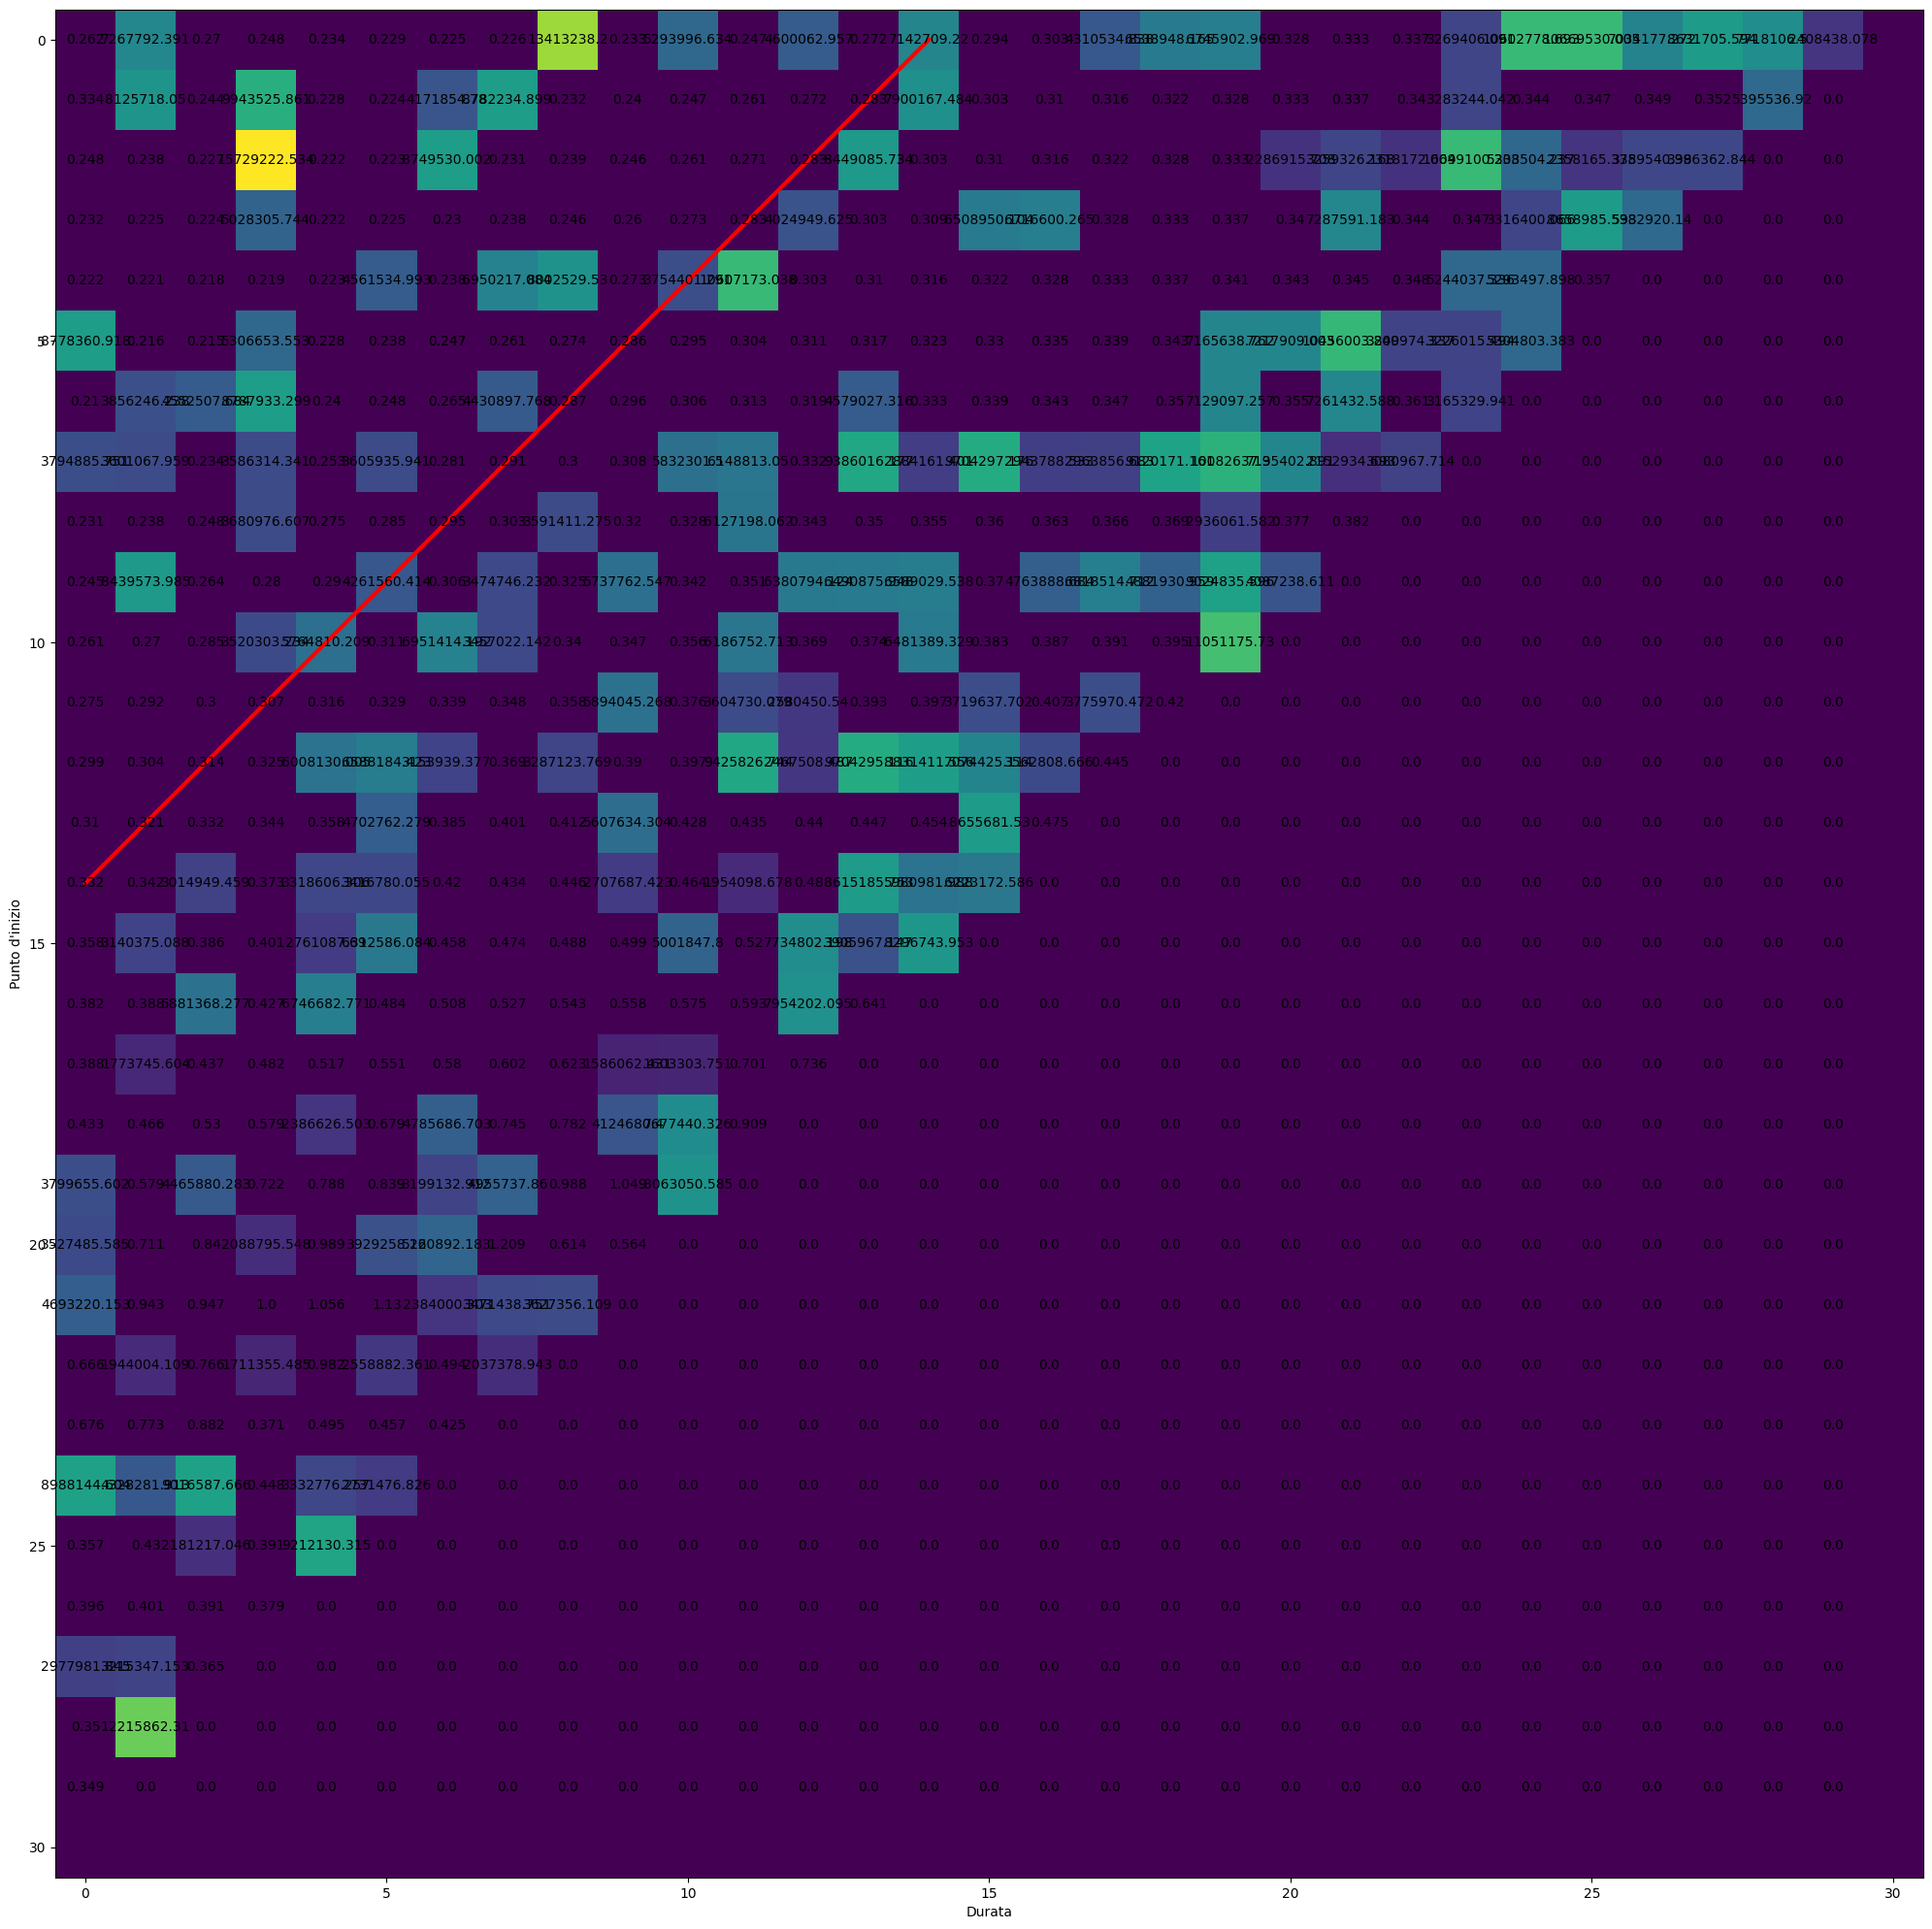

In [19]:
fig, ax = plt.subplots()
image = ax.imshow(davisBouldin6[:,:])
line_start = [0, np.floor(71/5)]
line_end = [np.floor(71/5), 0]
plt.plot(line_start, line_end, color="red", linewidth=3)
plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")

fig.set_size_inches(25,25)
for i in range(x):
    for j in range(y):
        c = np.round(davisBouldin6[i,j],decimals=3)
        ax.text(j, i, str(c), va='center', ha='center')
plt.show()